----

----

In [78]:
import pandas as pd
import numpy as np

def read_data(file_path, list_stocks=None, start_time="2010-01-01", end_time="2025-01-01"):
    df = pd.read_csv(file_path)

    if not list_stocks:
        list_stocks = df['stock_code'].unique()

    result_df = {}

    for stock in list_stocks:
        data = df[df['stock_code'] == stock].copy()
        data['transaction_date'] = pd.to_datetime(data['transaction_date'])

        # Lag Features
        data['lag_1'] = data['closing_price'].shift(1)
        data['lag_5'] = data['closing_price'].shift(5)
        data['lag_10'] = data['closing_price'].shift(10)

        # Rolling Mean Features
        data['rolling_mean_5'] = data['closing_price'].rolling(window=5).mean()
        data['rolling_mean_10'] = data['closing_price'].rolling(window=10).mean()
        data['rolling_mean_20'] = data['closing_price'].rolling(window=20).mean()

        # Rolling Std Features
        data['rolling_std_5'] = data['closing_price'].rolling(window=5).std()
        data['rolling_std_10'] = data['closing_price'].rolling(window=10).std()
        data['rolling_std_20'] = data['closing_price'].rolling(window=20).std()

        # Expanding Mean Feature
        data['expanding_mean'] = data['closing_price'].expanding().mean()

        data = data.fillna(0)
        data = data.replace([np.inf, -np.inf], 0)
        data = data[(data["transaction_date"] >= start_time) & (data["transaction_date"] < end_time)]

        feature_columns = ['transaction_date', 'closing_price', 'lag_1', 'lag_5', 'lag_10',
                           'rolling_mean_5', 'rolling_mean_10', 'rolling_mean_20',
                           'rolling_std_5', 'rolling_std_10', 'rolling_std_20', 'expanding_mean']

        selected_data = data[feature_columns]
        result_df[stock] = selected_data

    return result_df


def compute_features(history_prices):
    """
    Tính các đặc trưng dựa trên các giá trị lịch sử của giá đóng cửa.
    Các đặc trưng được tính gồm:
      - closing_price: giá đóng cửa của ngày mới nhất.
      - lag_1, lag_5, lag_10: giá của 1, 5, 10 ngày trước đó.
      - rolling_mean_5, rolling_mean_10, rolling_mean_20: trung bình trượt với cửa sổ 5, 10, 20 ngày.
      - rolling_std_5, rolling_std_10, rolling_std_20: độ lệch chuẩn trượt với cửa sổ 5, 10, 20 ngày.
      - expanding_mean: trung bình cộng tích lũy của toàn bộ lịch sử.
    Nếu số lượng dữ liệu không đủ cho một số tính toán, giá trị trung bình hoặc std của toàn bộ chuỗi sẽ được sử dụng.
    """

    series = pd.Series(history_prices)

    # Giá đóng cửa của ngày mới nhất
    cp = series.iloc[-1]

    # Lag Features
    lag_1 = series.shift(1).iloc[-1] if len(series) >= 2 else 0
    lag_5 = series.shift(5).iloc[-1] if len(series) >= 6 else 0
    lag_10 = series.shift(10).iloc[-1] if len(series) >= 11 else 0

    # Rolling Mean Features
    if len(series) >= 5:
        rolling_mean_5 = series.rolling(window=5).mean().iloc[-1]
    else:
        rolling_mean_5 = series.mean()

    if len(series) >= 10:
        rolling_mean_10 = series.rolling(window=10).mean().iloc[-1]
    else:
        rolling_mean_10 = series.mean()

    if len(series) >= 20:
        rolling_mean_20 = series.rolling(window=20).mean().iloc[-1]
    else:
        rolling_mean_20 = series.mean()

    # Rolling Std Features
    if len(series) >= 5:
        rolling_std_5 = series.rolling(window=5).std().iloc[-1]
    else:
        rolling_std_5 = series.std()

    if len(series) >= 10:
        rolling_std_10 = series.rolling(window=10).std().iloc[-1]
    else:
        rolling_std_10 = series.std()

    if len(series) >= 20:
        rolling_std_20 = series.rolling(window=20).std().iloc[-1]
    else:
        rolling_std_20 = series.std()

    # Expanding Mean Feature
    expanding_mean = series.expanding().mean().iloc[-1]

    return [cp, lag_1, lag_5, lag_10,
            rolling_mean_5, rolling_mean_10, rolling_mean_20,
            rolling_std_5, rolling_std_10, rolling_std_20,
            expanding_mean]



In [79]:
list_stock = ['ACB']
file_path = "/content/stock_data_final.csv"
all_data = read_data(file_path=file_path, list_stocks=list_stock)


In [80]:
all_data['ACB']

,transaction_date,closing_price,lag_1,lag_5,lag_10,rolling_mean_5,rolling_mean_10,rolling_mean_20,rolling_std_5,rolling_std_10,rolling_std_20,expanding_mean
0,2017-01-03,19.0,0.0,0.0,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000000,19.000000
1,2017-01-04,19.1,19.0,0.0,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000000,19.050000
2,2017-01-05,19.1,19.1,0.0,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000000,19.066667
3,2017-01-06,20.1,19.1,0.0,0.0,0.00,0.00,0.00,0.000000,0.000000,0.000000,19.325000
4,2017-01-09,20.8,20.1,0.0,0.0,19.62,0.00,0.00,0.798123,0.000000,0.000000,19.620000
...,...,...,...,...,...,...,...,...,...,...,...,...
2081,2024-12-25,25.4,25.0,25.2,25.4,24.98,25.10,25.21,0.248998,0.210819,0.246875,28.111095
2082,2024-12-26,25.6,25.4,24.8,25.3,25.14,25.13,25.23,0.343511,0.258414,0.261775,28.109890
2083,2024-12-27,25.6,25.6,24.8,25.2,25.30,25.17,25.25,0.331662,0.298329,0.274341,28.108685
2084,2024-12-30,25.4,25.6,24.9,25.2,25.40,25.19,25.26,0.244949,0.307137,0.276063,28.107386


# Transformer

In [81]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

In [82]:
def preprocess_data(data, sequence_length):
    data['transaction_date'] = pd.to_datetime(data['transaction_date'])

    train_data = data[data['transaction_date'].dt.year < 2024].reset_index(drop=True)
    test_data = data[data['transaction_date'].dt.year >= 2024].reset_index(drop=True)


    # train_data['day_of_week'] = train_data['transaction_date'].dt.dayofweek
    # train_data['month'] = train_data['transaction_date'].dt.month
    # train_data['quarter'] = train_data['transaction_date'].dt.quarter
    # test_data['day_of_week'] = test_data['transaction_date'].dt.dayofweek
    # test_data['month'] = test_data['transaction_date'].dt.month
    # test_data['quarter'] = test_data['transaction_date'].dt.quarter

    close_price_train = train_data['closing_price'].values.reshape(-1, 1)
    close_price_test = test_data['closing_price'].values.reshape(-1, 1)

    scaler_y = StandardScaler()
    scaled_close_train = scaler_y.fit_transform(close_price_train)
    scaled_close_test = scaler_y.transform(close_price_test)

    scaler_x = StandardScaler()


    scaled_features_train = scaler_x.fit_transform(train_data.drop(columns=['transaction_date']))
    scaled_features_test = scaler_x.transform(test_data.drop(columns=['transaction_date']))

    X_train, y_train = [], []
    for i in range(sequence_length, len(train_data), 1):
        X_train.append(scaled_features_train[i-sequence_length:i])
        y_train.append(scaled_close_train[i, 0])

    X_train, y_train = np.array(X_train), np.array(y_train)

    X_test, y_test = [], []
    dates_test = []
    for i in range(sequence_length, len(test_data), 1):
        X_test.append(scaled_features_test[i-sequence_length:i])
        y_test.append(scaled_close_test[i, 0])
        dates_test.append(test_data.iloc[i]['transaction_date'])

    X_test, y_test = np.array(X_test), np.array(y_test)

    return X_train, X_test, y_train, y_test,scaler_x, scaler_y, data.drop(columns=['transaction_date']).columns, dates_test

In [83]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=2100):
        super(PositionalEncoding, self).__init__()

        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe)

    def forward(self, seq_len):
        # Trả về mã hóa vị trí để cộng với input
        # Không thay đổi kích thước input
        return self.pe[:seq_len, :]

def generate_causal_mask(seq_len):
    mask = torch.triu(torch.ones(seq_len, seq_len), diagonal=1).bool()
    return mask

# --- Transformer Model cho chuỗi thời gian ---
class TimeSeriesTransformer(nn.Module):
    def __init__(self, feature_size, hidden_dim=128, num_layers=3, nhead=4, dropout=0.1):
        super(TimeSeriesTransformer, self).__init__()
        self.feature_size = feature_size
        self.hidden_dim = hidden_dim

        # Feature projection layer
        self.input_projection = nn.Linear(feature_size, hidden_dim)

        # Positional encoding
        self.pos_encoder = PositionalEncoding(hidden_dim)

        # Transformer encoder
        encoder_layers = nn.TransformerEncoderLayer(
            d_model=hidden_dim,
            nhead=nhead,
            dim_feedforward=hidden_dim*4,
            dropout=dropout,
            batch_first=True  # Sử dụng batch_first=True
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layers, num_layers=num_layers)

        # Output layers
        self.decoder = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.GELU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim // 2, 1)
        )

        # Khởi tạo trọng số
        self._init_weights()

    def _init_weights(self):
        for p in self.parameters():
            if p.dim() > 1:
                nn.init.xavier_normal_(p)

    def forward(self, src):
        # src shape: [batch_size, seq_len, feature_size]
        src = self.input_projection(src)  # [batch_size, seq_len, hidden_dim]
        src = src + self.pos_encoder(src.size(1))  # Cộng positional encoding

        # Tạo causal mask
        seq_len = src.size(1)
        mask = generate_causal_mask(seq_len).to(src.device)

        # Áp dụng transformer encoder với mask
        output = self.transformer_encoder(src, mask=mask)

        # Kết hợp thông tin qua average pooling và last time step
        avg_pooling = output.mean(dim=1)      # [batch_size, hidden_dim]
        last_step = output[:, -1, :]           # [batch_size, hidden_dim]
        combined = (avg_pooling + last_step) / 2

        output = self.decoder(combined)
        return output

    def configure_optimizers(self, learning_rate=5e-4, train_loader=None, epochs=30):
        optimizer = optim.AdamW(self.parameters(), lr=learning_rate, weight_decay=1e-4)
        if train_loader is None:
            raise ValueError("train_loader must be provided to calculate steps_per_epoch")
        steps_per_epoch = len(train_loader)
        scheduler = optim.lr_scheduler.OneCycleLR(
            optimizer,
            max_lr=learning_rate,
            steps_per_epoch=steps_per_epoch,
            epochs=epochs,
            pct_start=0.3,
            div_factor=25,
            final_div_factor=1000
        )
        return optimizer, scheduler

In [84]:
class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

In [85]:
def train_model(model, train_loader, val_loader, epochs=40, patience=10):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    model = model.to(device)
    criterion = nn.HuberLoss(delta=1.0)

    optimizer, scheduler = model.configure_optimizers(learning_rate=5e-4, train_loader=train_loader, epochs=epochs)

    best_val_loss = float('inf')
    best_model = None
    counter = 0

    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        train_loss = 0

        for batch_x, batch_y in train_loader:
            batch_x, batch_y = batch_x.to(device), batch_y.to(device)
            optimizer.zero_grad()
            outputs = model(batch_x).squeeze()
            loss = criterion(outputs, batch_y)
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            # Cập nhật scheduler mỗi batch
            if scheduler.last_epoch < scheduler.total_steps:
              scheduler.step()
            train_loss += loss.item()

        # Validation
        model.eval()
        val_loss = 0
        with torch.no_grad():
            for batch_x, batch_y in val_loader:
                batch_x, batch_y = batch_x.to(device), batch_y.to(device)
                outputs = model(batch_x).squeeze()
                loss = criterion(outputs, batch_y)
                val_loss += loss.item()
        train_loss /= len(train_loader)
        val_loss /= len(val_loader)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        print(f'Epoch {epoch+1}/{epochs}, Train Loss: {train_loss:.6f}, Val Loss: {val_loss:.6f}')

        # if val_loss < best_val_loss * 0.5:  # yêu cầu cải thiện 1%
        #     best_val_loss = val_loss
        #     best_model = model.state_dict().copy()
        #     counter = 0
        # else:
        #     counter += 1
        #     if counter >= patience:
        #         print(f'Early stopping after {epoch+1} epochs')
        #         break


    return model, train_losses, val_losses

In [86]:
def predict_next_days(model, last_sequence, history_prices, scaler_y, scaler_x, n_days, device='cpu'):
    """
    Hàm dự đoán giá cổ phiếu cho ngày tiếp theo.
    """
    model.eval()
    predictions = []
    # current_sequence là copy của last_sequence (đã scale)
    current_sequence = last_sequence.copy()  # shape: (seq_len, num_features)

    for _ in range(n_days):
        # Chuẩn bị input cho mô hình: thêm batch dimension
        input_seq = torch.tensor(current_sequence, dtype=torch.float32).unsqueeze(0).to(device)
        with torch.no_grad():
            pred_scaled = model(input_seq).item()  # dự đoán giá đóng cửa (đã scale)

        # Chuyển dự đoán về giá gốc
        pred_unscaled = scaler_y.inverse_transform(np.array([[pred_scaled]]))[0, 0]
        predictions.append(pred_unscaled)

        # Cập nhật lịch sử giá với giá dự đoán mới (unscaled)
        history_prices.append(pred_unscaled)

        # Tính lại các chỉ báo dựa trên lịch sử mới
        new_features_unscaled = compute_features(history_prices)

        # Scale các feature mới sử dụng scaler_x (cần đảm bảo thứ tự feature giống như training)
        new_features_scaled = scaler_x.transform(np.array(new_features_unscaled).reshape(1, -1))[0]

        # Cập nhật current_sequence: loại bỏ phần tử đầu tiên và thêm new_features_scaled vào cuối
        current_sequence = np.concatenate([current_sequence[1:], new_features_scaled.reshape(1, -1)], axis=0)

    return predictions

In [94]:
sequence_length = 10
batch_size = 32
hidden_dim = 64
num_layers = 4
nhead = 4

In [95]:
list_stock = ['ACB']
file_path = "/content/stock_data_final.csv"
all_data = read_data(file_path=file_path, list_stocks=list_stock)
stock_code = 'ACB'

In [96]:
stock_data = all_data[stock_code]
# market_returns_data[stock_code] = stock_data['closing_price'].pct_change()[(stock_data['transaction_date'] < "2024-01-01") & (stock_data['transaction_date'] >= "2023-01-01")].reset_index(drop=True)

X_train, X_test, y_train, y_test, scaler_x, scaler_y, features, _ = preprocess_data(stock_data, sequence_length)


train_dataset = TimeSeriesDataset(X_train, y_train)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(TimeSeriesDataset(X_test, y_test), batch_size=batch_size)


feature_size = X_train.shape[2]
model = TimeSeriesTransformer(
    feature_size=feature_size,
    hidden_dim=hidden_dim,
    num_layers=num_layers,
    nhead=nhead
)

model, train_losses, val_losses = train_model(model, train_loader, test_loader, epochs=100)


Using device: cuda


/usr/local/lib/python3.11/dist-packages/torch/nn/modules/loss.py:1102: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.huber_loss(input, target, reduction=self.reduction, delta=self.delta)


Epoch 1/100, Train Loss: 0.477553, Val Loss: 0.044639
Epoch 2/100, Train Loss: 0.174438, Val Loss: 0.031756
Epoch 3/100, Train Loss: 0.129820, Val Loss: 0.027654
Epoch 4/100, Train Loss: 0.118444, Val Loss: 0.010987
Epoch 5/100, Train Loss: 0.094888, Val Loss: 0.008080
Epoch 6/100, Train Loss: 0.094220, Val Loss: 0.005227
Epoch 7/100, Train Loss: 0.108521, Val Loss: 0.004915
Epoch 8/100, Train Loss: 0.092764, Val Loss: 0.024854
Epoch 9/100, Train Loss: 0.083242, Val Loss: 0.006960
Epoch 10/100, Train Loss: 0.079695, Val Loss: 0.055236
Epoch 11/100, Train Loss: 0.126032, Val Loss: 0.015661
Epoch 12/100, Train Loss: 0.071065, Val Loss: 0.023093
Epoch 13/100, Train Loss: 0.096196, Val Loss: 0.077175
Epoch 14/100, Train Loss: 0.095799, Val Loss: 0.013684
Epoch 15/100, Train Loss: 0.133179, Val Loss: 0.030075
Epoch 16/100, Train Loss: 0.070786, Val Loss: 0.010377
Epoch 17/100, Train Loss: 0.110387, Val Loss: 0.023783
Epoch 18/100, Train Loss: 0.089882, Val Loss: 0.012910
Epoch 19/100, Train

In [100]:
train_data = stock_data[stock_data['transaction_date'] < "2024-01-01"]
test_data = stock_data[(stock_data['transaction_date'] >= "2024-01-01") & (stock_data['transaction_date'] < "2024-02-01")]

history_prices = list(train_data["closing_price"].values)

# last_volume_features = [train_data.iloc[-1]["Volume_Change"], train_data.iloc[-1]["Volume_MA10"]]

last_sequence_unscaled = train_data.iloc[-sequence_length:, :].drop(columns='transaction_date')  # (3, 13)
last_sequence = scaler_x.transform(last_sequence_unscaled)

n_days = test_data.shape[0]
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
predictions = predict_next_days(model, last_sequence, history_prices.copy(), scaler_y, scaler_x, n_days, device=device)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

In [101]:
r2_score(test_data['closing_price'], predictions)

-8.097602565657859

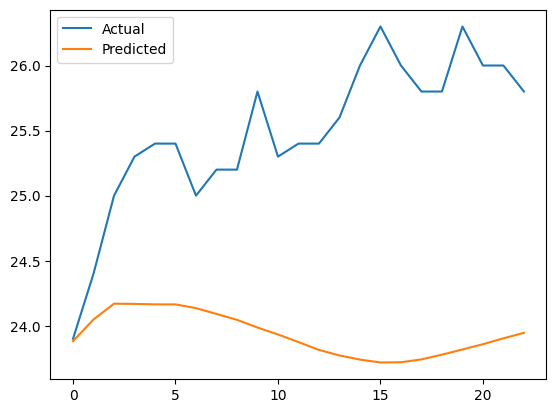

In [102]:
plt.plot(test_data['closing_price'].values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

In [110]:
def evaluate_model(model, test_loader, scaler_y):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.eval()
    predictions = []
    actuals = []

    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            batch_x = batch_x.to(device)
            outputs = model(batch_x).cpu().numpy().flatten()
            predictions.extend(outputs)
            actuals.extend(batch_y.numpy())

    # Inverse transform to get actual prices
    predictions = np.array(predictions).reshape(-1, 1)
    actuals = np.array(actuals).reshape(-1, 1)

    predictions_orig = scaler_y.inverse_transform(predictions)
    actuals_orig = scaler_y.inverse_transform(actuals)

    # Calculate metrics
    mse = mean_squared_error(actuals_orig, predictions_orig)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actuals_orig, predictions_orig)
    r2 = r2_score(actuals_orig, predictions_orig)

    print(f'Test Results:')
    print(f'MSE: {mse:.2f}')
    print(f'RMSE: {rmse:.2f}')
    print(f'MAE: {mae:.2f}')
    print(f'R^2: {r2:.4f}')

    return predictions_orig, actuals_orig, {'mse': mse, 'rmse': rmse, 'mae': mae, 'r2': r2}


In [111]:
predictions, actuals, metrics = evaluate_model(model, test_loader, scaler_y)

Test Results:
MSE: 0.19
RMSE: 0.44
MAE: 0.31
R^2: 0.9105


In [112]:
def plot_results(predictions, actuals, train_losses=None, val_losses=None):
    plt.figure(figsize=(16, 12))

    # Plot training and validation loss
    if train_losses is not None and val_losses is not None:
        plt.subplot(2, 1, 1)
        plt.plot(train_losses, label='Train Loss')
        plt.plot(val_losses, label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()

    # Plot predictions vs actuals
    plt.subplot(2, 1, 2)

    plt.plot(actuals, label='Actual')
    plt.plot(predictions, label='Predicted', linestyle='--')

    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.title('Stock Price Prediction')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [113]:
def plot_performance_comparison(optimization_results, returns_data, expected_returns, cov_matrix, labels=['MVO', 'Monte Carlo']):
    """
    Vẽ biểu đồ so sánh hiệu suất của các danh mục đầu tư từ các trọng số tối ưu.
    - optimization_results: dict chứa trọng số và các thông số hiệu suất đã tính toán
    - returns_data: DataFrame chứa dữ liệu lợi nhuận hàng ngày của các cổ phiếu
    """
    plt.figure(figsize=(14, 6))

    # Vẽ biểu đồ tích lũy lợi nhuận
    plt.subplot(1, 2, 1)
    for i, key in enumerate(optimization_results.keys()):
        result = evaluate_portfolio(optimization_results[key]['weights'], expected_returns, cov_matrix, returns_data)
        plt.plot(result['cumulative_returns'], label=f"{labels[i]} (Sharpe={result['sharpe']:.2f})")
    plt.title("Cumulative Returns Comparison")
    plt.xlabel("Time")
    plt.ylabel("Cumulative Returns")
    plt.legend()
    plt.grid(True)

    # Vẽ scatter Risk vs Return
    plt.subplot(1, 2, 2)
    for i, key in enumerate(optimization_results.keys()):
        result = evaluate_portfolio(optimization_results[key]['weights'], expected_returns, cov_matrix, returns_data)
        plt.scatter(result['risk'], result['expected_return'], s=100, label=f"{labels[i]} (Sharpe={result['sharpe']:.2f})")
        plt.text(result['risk'], result['expected_return'], f" {labels[i]}")
    plt.title("Risk vs Return")
    plt.xlabel("Risk (Volatility)")
    plt.ylabel("Expected Return")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Các hàm tối ưu hóa

In [114]:
import numpy as np
from scipy.optimize import minimize
import scipy.optimize as sco
import random


# Tính toán các chỉ số
def calculate_returns_risk(predictions, scaler=None):

    if scaler is not None:
      original_predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
    else:
      original_predictions = predictions

    # Lợi nhuận hàng ngày
    returns = np.diff(original_predictions, axis=0) / original_predictions[:-1]

    # Lợi nhuận kỳ vọng và rủi ro
    expected_return = np.mean(returns)
    risk = np.std(returns)

    risk_free_rate = 0.02 / 52
    sharpe_ratio = (expected_return - risk_free_rate) / risk if risk != 0 else 0

    # Tỷ lệ Sortino (chỉ tính downside risk)
    downside_returns = returns[returns < 0]
    downside_risk = np.std(downside_returns) if len(downside_returns) > 0 else 0
    sortino_ratio = (expected_return - risk_free_rate) / downside_risk if downside_risk > 0 else 0

    # Maximum Drawdown
    cumulative = np.cumprod(1 + returns.flatten())
    running_max = np.maximum.accumulate(cumulative)
    drawdown = (cumulative / running_max) - 1
    max_drawdown = np.min(drawdown)

    return {
        'expected_return': expected_return,
        'risk': risk,
        'sharpe_ratio': sharpe_ratio,
        'sortino_ratio': sortino_ratio,
        'max_drawdown': max_drawdown
    }

#-----------------------------------------------------------------------------------------------------------------------------------------
# MVO
def mvo_optimization(expected_returns, cov_matrix,
                     risk_free_rate=0.02/252,
                     max_weight=0.4,
                     alpha=0):
    """
    Tối ưu hóa danh mục đầu tư theo phương pháp Mean-Variance Optimization (MVO)
    với các ràng buộc nâng cao:
      - Tổng trọng số = 1
      - 0 <= w_i <= max_weight (để tránh dồn hết vào 1 mã)
      - Thêm penalty alpha * sum(w_i^2) nếu alpha > 0 (để tránh danh mục tập trung)
    """
    n = len(expected_returns)

    # Hàm mục tiêu: Tối đa hóa Sharpe Ratio (hoặc tối thiểu hóa -Sharpe)
    def negative_sharpe_ratio(weights):
        portfolio_return = np.sum(weights * expected_returns)
        portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        sharpe = (portfolio_return - risk_free_rate) / (portfolio_risk + 1e-8)
        # Thêm penalty để "phạt" danh mục quá tập trung
        penalty = alpha * np.sum(weights**2)
        return -sharpe + penalty

    # Ràng buộc: Tổng trọng số = 1
    constraints = [{'type': 'eq', 'fun': lambda x: np.sum(x) - 1}]

    bounds = tuple((0, max_weight) for _ in range(n))

    initial_weights = np.array([1/n] * n)

    try:
        result = minimize(
            negative_sharpe_ratio,
            initial_weights,
            method='SLSQP',
            bounds=bounds,
            constraints=constraints,
            options={'maxiter': 1000}
        )

        if result['success']:
            weights = result['x']

            weights[weights < 1e-4] = 0
            if np.sum(weights) > 0:
                weights = weights / np.sum(weights)
            else:
                weights = initial_weights
            return weights
        else:
            print("Tối ưu hóa không thành công:", result['message'])
            return initial_weights
    except Exception as e:
        print(f"Lỗi trong quá trình tối ưu hóa: {e}")
        return initial_weights



# Định nghĩa các hàm tính toán hiệu suất danh mục đầu tư
def portfolio_return(weights, expected_returns):
    """Tính lợi nhuận kỳ vọng của danh mục đầu tư"""
    return np.sum(weights * expected_returns)

def portfolio_volatility(weights, cov_matrix):
    """Tính rủi ro (độ biến động) của danh mục đầu tư"""
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

def portfolio_sharpe_ratio(weights, expected_returns, cov_matrix, risk_free_rate=0.02/252):
    """Tính Sharpe ratio của danh mục đầu tư"""
    portfolio_ret = portfolio_return(weights, expected_returns)
    portfolio_vol = portfolio_volatility(weights, cov_matrix)
    return (portfolio_ret - risk_free_rate) / portfolio_vol if portfolio_vol > 0 else 0


#----------------------------------------------------------------------------------------------------------------------------
# Phương pháp Monte Carlo
def monte_carlo_simulation(expected_returns, cov_matrix, risk_free_rate=0.02/252,
                                   num_simulations=50000, max_weight=0.4):
    num_assets = len(expected_returns)
    results = np.zeros((num_simulations, num_assets + 3))  # +3 for return, volatility, sharpe

    for i in range(num_simulations):
        # Tạo trọng số ngẫu nhiên với ràng buộc max_weight
        weights = np.random.uniform(0, max_weight, num_assets)
        # Chuẩn hóa tổng = 1
        weights = weights / np.sum(weights)

        # Tính toán lợi nhuận và rủi ro của danh mục
        portfolio_ret = portfolio_return(weights, expected_returns)
        portfolio_vol = portfolio_volatility(weights, cov_matrix)
        sharpe = (portfolio_ret - risk_free_rate) / portfolio_vol if portfolio_vol > 0 else 0

        # Lưu kết quả
        results[i, :num_assets] = weights
        results[i, num_assets] = portfolio_ret
        results[i, num_assets + 1] = portfolio_vol
        results[i, num_assets + 2] = sharpe

    # Tìm danh mục có tỷ lệ Sharpe cao nhất
    max_sharpe_idx = np.argmax(results[:, num_assets + 2])

    optimal_weights = results[max_sharpe_idx, :num_assets]
    optimal_return = results[max_sharpe_idx, num_assets]
    optimal_vol = results[max_sharpe_idx, num_assets + 1]
    optimal_sharpe = results[max_sharpe_idx, num_assets + 2]

    # Tìm danh mục có rủi ro thấp nhất
    min_vol_idx = np.argmin(results[:, num_assets + 1])
    min_vol_weights = results[min_vol_idx, :num_assets]

    return {
        'max_sharpe': {
            'weights': optimal_weights,
            'return': optimal_return,
            'risk': optimal_vol,
            'sharpe': optimal_sharpe
        },
        'min_volatility': {
            'weights': min_vol_weights,
            'return': results[min_vol_idx, num_assets],
            'risk': results[min_vol_idx, num_assets + 1],
            'sharpe': results[min_vol_idx, num_assets + 2]
        },
        'efficient_frontier': results[:, [num_assets + 1, num_assets]]  # risk, return pairs
    }



In [115]:
sequence_length = 10
batch_size = 32
hidden_dim = 64
num_layers = 4
nhead = 8

In [117]:
list_stock = ['TMB', 'HGM', 'PVS', 'PVD', 'FPT', 'ITD', 'VIC', 'ACB', 'VCB','MBB']
file_path = "/content/stock_data_final.csv"
all_data = read_data(file_path=file_path, list_stocks=list_stock)


In [149]:


market_returns_data = pd.DataFrame()

all_predictions = {}
all_predictions_1_months = {}
all_models = {}
all_stats = {}
all_eval = {}

for stock_code in list_stock:

    stock_data = all_data[stock_code]
    market_returns_data[stock_code] = stock_data['closing_price'].pct_change()[(stock_data['transaction_date'] < "2024-01-01") & (stock_data['transaction_date'] >= "2023-01-01")].reset_index(drop=True)

    X_train, X_test, y_train, y_test, scaler_x, scaler_y, features, _ = preprocess_data(stock_data, sequence_length)


    train_dataset = TimeSeriesDataset(X_train, y_train)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(TimeSeriesDataset(X_test, y_test), batch_size=batch_size)


    feature_size = X_train.shape[2]
    model = TimeSeriesTransformer(
        feature_size=feature_size,
        hidden_dim=hidden_dim,
        num_layers=num_layers,
        nhead=nhead
    )

    model, train_losses, val_losses = train_model(model, train_loader, test_loader, epochs=100)

    # Đánh giá mô hình
    predictions, actuals, metrics = evaluate_model(model, test_loader, scaler_y)
    all_predictions[stock_code] = {'y_test': actuals, 'y_pred':predictions}


    all_eval[stock_code] = metrics

    stock_data = all_data[stock_code]
    train_data = stock_data[stock_data['transaction_date'] < "2024-01-01"]
    test_data = stock_data[(stock_data['transaction_date'] >= "2024-01-01") & (stock_data['transaction_date'] < "2024-02-01")]

    history_prices = list(train_data["closing_price"].values)
    last_sequence_unscaled = train_data.iloc[-sequence_length:, :].drop(columns='transaction_date')  # (3, 13)
    last_sequence = scaler_x.transform(last_sequence_unscaled)

    n_days = test_data.shape[0]
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    predictions = predict_next_days(model, last_sequence, history_prices.copy(), scaler_y, scaler_x, n_days, device=device)

    risk_stats = calculate_returns_risk(predictions)

    all_stats[stock_code] = {
        'stats': risk_stats
    }

    all_predictions_1_months[stock_code] = {'y_test': actuals, 'y_pred':predictions}




Using device: cuda
Epoch 1/100, Train Loss: 0.408413, Val Loss: 5.271540
Epoch 2/100, Train Loss: 0.223244, Val Loss: 4.717040
Epoch 3/100, Train Loss: 0.155762, Val Loss: 4.269730
Epoch 4/100, Train Loss: 0.130487, Val Loss: 3.972634
Epoch 5/100, Train Loss: 0.109078, Val Loss: 3.767151
Epoch 6/100, Train Loss: 0.088934, Val Loss: 3.512271
Epoch 7/100, Train Loss: 0.090587, Val Loss: 3.315528
Epoch 8/100, Train Loss: 0.070263, Val Loss: 3.068948
Epoch 9/100, Train Loss: 0.053349, Val Loss: 2.768853
Epoch 10/100, Train Loss: 0.045321, Val Loss: 2.537125
Epoch 11/100, Train Loss: 0.052306, Val Loss: 2.517055
Epoch 12/100, Train Loss: 0.077372, Val Loss: 2.548445
Epoch 13/100, Train Loss: 0.064140, Val Loss: 2.550460
Epoch 14/100, Train Loss: 0.075185, Val Loss: 2.664363
Epoch 15/100, Train Loss: 0.103388, Val Loss: 3.406380
Epoch 16/100, Train Loss: 0.084971, Val Loss: 2.828515
Epoch 17/100, Train Loss: 0.181623, Val Loss: 2.207411
Epoch 18/100, Train Loss: 0.125304, Val Loss: 2.828019


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

Using device: cuda
Epoch 1/100, Train Loss: 0.382004, Val Loss: 6.527129
Epoch 2/100, Train Loss: 0.242431, Val Loss: 6.102721
Epoch 3/100, Train Loss: 0.183045, Val Loss: 5.742639
Epoch 4/100, Train Loss: 0.164708, Val Loss: 5.427850
Epoch 5/100, Train Loss: 0.139115, Val Loss: 5.214337
Epoch 6/100, Train Loss: 0.137557, Val Loss: 5.096318
Epoch 7/100, Train Loss: 0.124039, Val Loss: 5.010971
Epoch 8/100, Train Loss: 0.112962, Val Loss: 4.924749
Epoch 9/100, Train Loss: 0.112658, Val Loss: 4.907118
Epoch 10/100, Train Loss: 0.115957, Val Loss: 4.792729
Epoch 11/100, Train Loss: 0.099046, Val Loss: 4.847937
Epoch 12/100, Train Loss: 0.100190, Val Loss: 4.747675
Epoch 13/100, Train Loss: 0.081738, Val Loss: 4.670535
Epoch 14/100, Train Loss: 0.078618, Val Loss: 4.640084
Epoch 15/100, Train Loss: 0.092875, Val Loss: 4.418097
Epoch 16/100, Train Loss: 0.073431, Val Loss: 4.616039
Epoch 17/100, Train Loss: 0.071543, Val Loss: 4.839589
Epoch 18/100, Train Loss: 0.071662, Val Loss: 4.765761


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

Epoch 1/100, Train Loss: 0.257795, Val Loss: 1.095858
Epoch 2/100, Train Loss: 0.148783, Val Loss: 0.663629
Epoch 3/100, Train Loss: 0.116593, Val Loss: 0.467515
Epoch 4/100, Train Loss: 0.098150, Val Loss: 0.341741
Epoch 5/100, Train Loss: 0.088163, Val Loss: 0.254524
Epoch 6/100, Train Loss: 0.076008, Val Loss: 0.144966
Epoch 7/100, Train Loss: 0.078330, Val Loss: 0.213250
Epoch 8/100, Train Loss: 0.064574, Val Loss: 0.091688
Epoch 9/100, Train Loss: 0.065494, Val Loss: 0.087812
Epoch 10/100, Train Loss: 0.094096, Val Loss: 0.137468
Epoch 11/100, Train Loss: 0.068223, Val Loss: 0.115244
Epoch 12/100, Train Loss: 0.061312, Val Loss: 0.194711
Epoch 13/100, Train Loss: 0.077156, Val Loss: 0.109681
Epoch 14/100, Train Loss: 0.141041, Val Loss: 0.119885
Epoch 15/100, Train Loss: 0.127572, Val Loss: 0.253427
Epoch 16/100, Train Loss: 0.097764, Val Loss: 0.106618
Epoch 17/100, Train Loss: 0.070859, Val Loss: 0.091581
Epoch 18/100, Train Loss: 0.096327, Val Loss: 0.175757
Epoch 19/100, Train

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

Using device: cuda
Epoch 1/100, Train Loss: 0.334045, Val Loss: 0.165934
Epoch 2/100, Train Loss: 0.169331, Val Loss: 0.063093
Epoch 3/100, Train Loss: 0.131727, Val Loss: 0.047383
Epoch 4/100, Train Loss: 0.115498, Val Loss: 0.047211
Epoch 5/100, Train Loss: 0.108085, Val Loss: 0.056691
Epoch 6/100, Train Loss: 0.099282, Val Loss: 0.041770
Epoch 7/100, Train Loss: 0.087913, Val Loss: 0.048634
Epoch 8/100, Train Loss: 0.088220, Val Loss: 0.051036
Epoch 9/100, Train Loss: 0.094285, Val Loss: 0.030092
Epoch 10/100, Train Loss: 0.088457, Val Loss: 0.040330
Epoch 11/100, Train Loss: 0.097947, Val Loss: 0.036281
Epoch 12/100, Train Loss: 0.087886, Val Loss: 0.055925
Epoch 13/100, Train Loss: 0.110435, Val Loss: 0.108273
Epoch 14/100, Train Loss: 0.094927, Val Loss: 0.090188
Epoch 15/100, Train Loss: 0.101582, Val Loss: 0.094278
Epoch 16/100, Train Loss: 0.127429, Val Loss: 0.174708
Epoch 17/100, Train Loss: 0.100920, Val Loss: 0.274027
Epoch 18/100, Train Loss: 0.108938, Val Loss: 0.406729


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

Epoch 1/100, Train Loss: 0.304608, Val Loss: 2.077056
Epoch 2/100, Train Loss: 0.133698, Val Loss: 1.550517
Epoch 3/100, Train Loss: 0.094126, Val Loss: 1.318288
Epoch 4/100, Train Loss: 0.083047, Val Loss: 1.076522
Epoch 5/100, Train Loss: 0.081247, Val Loss: 0.816782
Epoch 6/100, Train Loss: 0.067119, Val Loss: 0.903524
Epoch 7/100, Train Loss: 0.087046, Val Loss: 1.203703
Epoch 8/100, Train Loss: 0.087940, Val Loss: 1.035442
Epoch 9/100, Train Loss: 0.104324, Val Loss: 0.908281
Epoch 10/100, Train Loss: 0.073016, Val Loss: 0.687107
Epoch 11/100, Train Loss: 0.054837, Val Loss: 0.791325
Epoch 12/100, Train Loss: 0.065219, Val Loss: 1.222927
Epoch 13/100, Train Loss: 0.054258, Val Loss: 1.336629
Epoch 14/100, Train Loss: 0.047667, Val Loss: 0.900430
Epoch 15/100, Train Loss: 0.073128, Val Loss: 1.214725
Epoch 16/100, Train Loss: 0.074828, Val Loss: 1.165132
Epoch 17/100, Train Loss: 0.056719, Val Loss: 1.296310
Epoch 18/100, Train Loss: 0.059466, Val Loss: 1.392128
Epoch 19/100, Train

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

Epoch 1/100, Train Loss: 0.230499, Val Loss: 0.071441
Epoch 2/100, Train Loss: 0.148617, Val Loss: 0.067059
Epoch 3/100, Train Loss: 0.099898, Val Loss: 0.066007
Epoch 4/100, Train Loss: 0.085394, Val Loss: 0.051086
Epoch 5/100, Train Loss: 0.067574, Val Loss: 0.044711
Epoch 6/100, Train Loss: 0.066372, Val Loss: 0.037461
Epoch 7/100, Train Loss: 0.065453, Val Loss: 0.056465
Epoch 8/100, Train Loss: 0.077825, Val Loss: 0.045839
Epoch 9/100, Train Loss: 0.100674, Val Loss: 0.042494
Epoch 10/100, Train Loss: 0.079480, Val Loss: 0.080469
Epoch 11/100, Train Loss: 0.154342, Val Loss: 0.089148
Epoch 12/100, Train Loss: 0.142040, Val Loss: 0.061837
Epoch 13/100, Train Loss: 0.137478, Val Loss: 0.069276
Epoch 14/100, Train Loss: 0.144483, Val Loss: 0.072106
Epoch 15/100, Train Loss: 0.123970, Val Loss: 0.042504
Epoch 16/100, Train Loss: 0.081340, Val Loss: 0.083041
Epoch 17/100, Train Loss: 0.139647, Val Loss: 0.061911
Epoch 18/100, Train Loss: 0.161199, Val Loss: 0.074880
Epoch 19/100, Train

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

Epoch 1/100, Train Loss: 0.177454, Val Loss: 0.001983
Epoch 2/100, Train Loss: 0.079320, Val Loss: 0.001927
Epoch 3/100, Train Loss: 0.062254, Val Loss: 0.001915
Epoch 4/100, Train Loss: 0.056128, Val Loss: 0.003052
Epoch 5/100, Train Loss: 0.063978, Val Loss: 0.005527
Epoch 6/100, Train Loss: 0.045814, Val Loss: 0.002376
Epoch 7/100, Train Loss: 0.066978, Val Loss: 0.004752
Epoch 8/100, Train Loss: 0.077953, Val Loss: 0.062628
Epoch 9/100, Train Loss: 0.044211, Val Loss: 0.002990
Epoch 10/100, Train Loss: 0.043319, Val Loss: 0.002373
Epoch 11/100, Train Loss: 0.085663, Val Loss: 0.098870
Epoch 12/100, Train Loss: 0.050193, Val Loss: 0.001761
Epoch 13/100, Train Loss: 0.045404, Val Loss: 0.003371
Epoch 14/100, Train Loss: 0.049336, Val Loss: 0.002793
Epoch 15/100, Train Loss: 0.045429, Val Loss: 0.014719
Epoch 16/100, Train Loss: 0.075331, Val Loss: 0.011427
Epoch 17/100, Train Loss: 0.055772, Val Loss: 0.004828
Epoch 18/100, Train Loss: 0.043865, Val Loss: 0.006641
Epoch 19/100, Train

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

Epoch 1/100, Train Loss: 0.303616, Val Loss: 0.022417
Epoch 2/100, Train Loss: 0.128962, Val Loss: 0.074845
Epoch 3/100, Train Loss: 0.115900, Val Loss: 0.030002
Epoch 4/100, Train Loss: 0.103598, Val Loss: 0.023356
Epoch 5/100, Train Loss: 0.120244, Val Loss: 0.023778
Epoch 6/100, Train Loss: 0.121151, Val Loss: 0.028967
Epoch 7/100, Train Loss: 0.175925, Val Loss: 0.028270
Epoch 8/100, Train Loss: 0.155773, Val Loss: 0.055204
Epoch 9/100, Train Loss: 0.176746, Val Loss: 0.036564
Epoch 10/100, Train Loss: 0.129750, Val Loss: 0.009419
Epoch 11/100, Train Loss: 0.105867, Val Loss: 0.046297
Epoch 12/100, Train Loss: 0.147167, Val Loss: 0.020958
Epoch 13/100, Train Loss: 0.077919, Val Loss: 0.067065
Epoch 14/100, Train Loss: 0.128135, Val Loss: 0.018497
Epoch 15/100, Train Loss: 0.145800, Val Loss: 0.026324
Epoch 16/100, Train Loss: 0.142747, Val Loss: 0.057015
Epoch 17/100, Train Loss: 0.079268, Val Loss: 0.012131
Epoch 18/100, Train Loss: 0.114530, Val Loss: 0.017226
Epoch 19/100, Train

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

Using device: cuda
Epoch 1/100, Train Loss: 0.327402, Val Loss: 0.035358
Epoch 2/100, Train Loss: 0.140511, Val Loss: 0.016488
Epoch 3/100, Train Loss: 0.094167, Val Loss: 0.014551
Epoch 4/100, Train Loss: 0.083168, Val Loss: 0.020783
Epoch 5/100, Train Loss: 0.066513, Val Loss: 0.012071
Epoch 6/100, Train Loss: 0.059351, Val Loss: 0.006591
Epoch 7/100, Train Loss: 0.058900, Val Loss: 0.007767
Epoch 8/100, Train Loss: 0.065896, Val Loss: 0.017090
Epoch 9/100, Train Loss: 0.055893, Val Loss: 0.015868
Epoch 10/100, Train Loss: 0.079287, Val Loss: 0.010502
Epoch 11/100, Train Loss: 0.056910, Val Loss: 0.017648
Epoch 12/100, Train Loss: 0.097230, Val Loss: 0.023047
Epoch 13/100, Train Loss: 0.086311, Val Loss: 0.011195
Epoch 14/100, Train Loss: 0.072693, Val Loss: 0.010688
Epoch 15/100, Train Loss: 0.072045, Val Loss: 0.009285
Epoch 16/100, Train Loss: 0.083519, Val Loss: 0.016198
Epoch 17/100, Train Loss: 0.059730, Val Loss: 0.014665
Epoch 18/100, Train Loss: 0.098147, Val Loss: 0.013001


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

Epoch 1/100, Train Loss: 0.256471, Val Loss: 0.117720
Epoch 2/100, Train Loss: 0.139777, Val Loss: 0.040563
Epoch 3/100, Train Loss: 0.108046, Val Loss: 0.026288
Epoch 4/100, Train Loss: 0.095370, Val Loss: 0.020225
Epoch 5/100, Train Loss: 0.081104, Val Loss: 0.018946
Epoch 6/100, Train Loss: 0.071428, Val Loss: 0.014926
Epoch 7/100, Train Loss: 0.073304, Val Loss: 0.023568
Epoch 8/100, Train Loss: 0.072848, Val Loss: 0.032612
Epoch 9/100, Train Loss: 0.069488, Val Loss: 0.022403
Epoch 10/100, Train Loss: 0.076235, Val Loss: 0.056407
Epoch 11/100, Train Loss: 0.069411, Val Loss: 0.024012
Epoch 12/100, Train Loss: 0.099772, Val Loss: 0.036911
Epoch 13/100, Train Loss: 0.111307, Val Loss: 0.070805
Epoch 14/100, Train Loss: 0.059759, Val Loss: 0.021136
Epoch 15/100, Train Loss: 0.074565, Val Loss: 0.037657
Epoch 16/100, Train Loss: 0.119081, Val Loss: 0.077593
Epoch 17/100, Train Loss: 0.067457, Val Loss: 0.044986
Epoch 18/100, Train Loss: 0.095443, Val Loss: 0.027630
Epoch 19/100, Train

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ut

In [147]:
df = pd.DataFrame.from_dict(all_eval, orient='index')
print(df)

             mse       rmse        mae          r2
TMB   766.290222  27.681948  26.007271   -6.745444
HGM  3111.142334  55.777615  31.355335   -0.440292
PVS   104.720024  10.233280   9.740808   -9.691401
PVD    39.484211   6.283646   6.064795   -3.838210
FPT  1621.493286  40.267770  38.590569   -7.362094
ITD     5.352889   2.313631   1.763896    0.119396
VIC  2464.212402  49.640834  49.591793 -518.757263
ACB     2.619458   1.618474   1.263478   -0.197558
VCB    70.094589   8.372251   8.012633   -9.920526
MBB     9.405065   3.066768   2.975443   -7.598261


In [127]:
df.to_csv("/content/result_transformer.csv")

In [153]:
expected_returns = []
risks = []
sharpe_ratios = []
market_caps = []

stocks_by_sharpe = sorted(
    all_stats.items(),
    key=lambda x: x[1]['stats']['sharpe_ratio'],
    reverse=True
)

top_n = min(len(stocks_by_sharpe), 5)  # Chọn top 4 cổ phiếu
selected_stocks = stocks_by_sharpe[:top_n]

selected_symbols = []
for symbol, stats in selected_stocks:
    selected_symbols.append(symbol)
    expected_returns.append(stats['stats']['expected_return'])
    risks.append(stats['stats']['risk'])
    sharpe_ratios.append(stats['stats']['sharpe_ratio'])


market_data = market_returns_data[selected_symbols].values
market_data = np.nan_to_num(market_data, nan=0.0, posinf=0.0, neginf=0.0)
cov_matrix = np.cov(market_data, rowvar=False)


In [154]:
all_predictions = all_predictions_1_months

In [156]:
# Định nghĩa các mốc thời gian (số phiên giao dịch)
time_horizons = {
    '1_month': 21,
}


horizon_optimization_results = {}


for horizon, days in time_horizons.items():
    horizon_expected_returns = []
    horizon_risks = []
    horizon_sharpe_ratios = []

    for stock_code in selected_symbols:
        predictions = all_predictions[stock_code]['y_pred']

        if len(predictions) >= days:
            pred_horizon = predictions[0:(days + 1)]
        else:
            pred_horizon = predictions

        stats = calculate_returns_risk(pred_horizon)
        horizon_expected_returns.append(stats['expected_return'])
        horizon_risks.append(stats['risk'])
        horizon_sharpe_ratios.append(stats['sharpe_ratio'])

    # (Tùy chọn) Điều chỉnh "views" dựa trên Sharpe ratio, tương tự như đoạn code gốc
    # views = horizon_expected_returns.copy()
    # for i in range(len(views)):
    #     if horizon_sharpe_ratios[i] > 1.0:
    #         views[i] *= 1.1
    #     elif horizon_sharpe_ratios[i] < 0.5:
    #         views[i] *= 0.9

    # Tối ưu hóa với MVO
    mvo_weights = mvo_optimization(horizon_expected_returns, cov_matrix, max_weight=1)
    port_return = portfolio_return(mvo_weights, horizon_expected_returns)
    port_risk = portfolio_volatility(mvo_weights, cov_matrix)
    port_sharpe = (port_return - 0.02/252) / port_risk if port_risk > 0 else 0

    # ---------------------------
    # Tối ưu hóa với Monte Carlo (Max Sharpe)
    mc_results = monte_carlo_simulation(horizon_expected_returns, cov_matrix)
    mc_weights = mc_results['max_sharpe']['weights']
    mc_port_return = portfolio_return(mc_weights, horizon_expected_returns)
    mc_port_risk = portfolio_volatility(mc_weights, cov_matrix)
    mc_port_sharpe = (mc_port_return - 0.02/252) / mc_port_risk if mc_port_risk > 0 else 0

    # Lưu kết quả tối ưu hóa cho mốc thời gian hiện tại
    horizon_optimization_results[horizon] = {
        'mvo': {
            'weights': mvo_weights,
            'return': port_return,
            'risk': port_risk,
            'sharpe': port_sharpe
        },
        'monte_carlo': {
            'weights': mc_weights,
            'return': mc_port_return,
            'risk': mc_port_risk,
            'sharpe': mc_port_sharpe
        }
    }

    # Hiển thị kết quả cho mốc thời gian hiện tại
    print(f"\n=== Kết quả cho mốc thời gian: {horizon} ===")

    print("\n[MVO]")
    print(f"  Expected Return: {port_return:.6f}")
    print(f"  Risk: {port_risk:.6f}")
    print(f"  Sharpe Ratio: {port_sharpe:.6f}")
    print("  Weights:")
    for i, symbol in enumerate(selected_symbols):
        print(f"    {symbol}: {mvo_weights[i]:.4f} ({mvo_weights[i]*100:.2f}%)")

    print("\n[Monte Carlo - Max Sharpe]")
    print(f"  Expected Return: {mc_port_return:.6f}")
    print(f"  Risk: {mc_port_risk:.6f}")
    print(f"  Sharpe Ratio: {mc_port_sharpe:.6f}")
    print("  Weights:")
    for i, symbol in enumerate(selected_symbols):
        print(f"    {symbol}: {mc_weights[i]:.4f} ({mc_weights[i]*100:.2f}%)")


=== Kết quả cho mốc thời gian: 1_month ===

[MVO]
  Expected Return: 0.006827
  Risk: 0.013290
  Sharpe Ratio: 0.507681
  Weights:
    HGM: 0.9162 (91.62%)
    TMB: 0.0207 (2.07%)
    VCB: 0.0000 (0.00%)
    PVS: 0.0000 (0.00%)
    ITD: 0.0631 (6.31%)

[Monte Carlo - Max Sharpe]
  Expected Return: 0.006702
  Risk: 0.013167
  Sharpe Ratio: 0.502949
  Weights:
    HGM: 0.8953 (89.53%)
    TMB: 0.0443 (4.43%)
    VCB: 0.0114 (1.14%)
    PVS: 0.0450 (4.50%)
    ITD: 0.0040 (0.40%)


# Plot Results

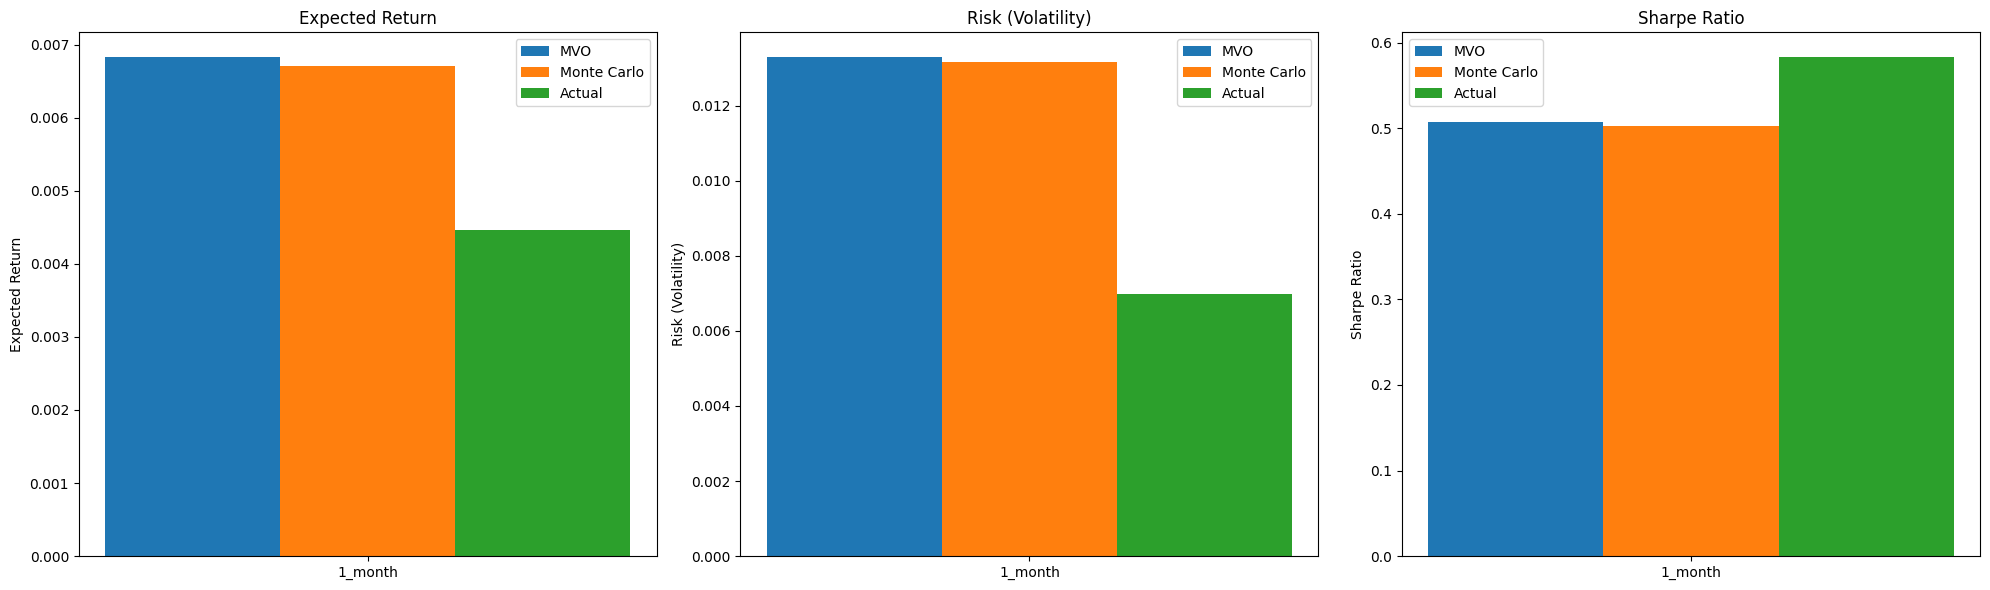

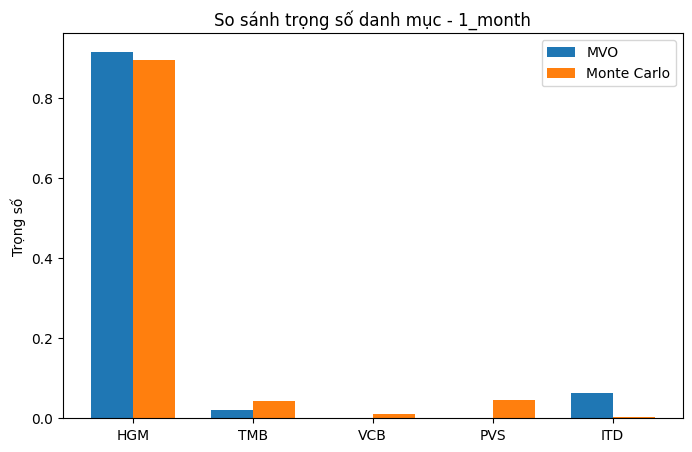

In [157]:
def compute_portfolio_actual_stats(all_data, selected_symbols, horizon, risk_free_rate=0.02/52):
    """
    Tính toán chỉ số danh mục đầu tư thực tế trong khoảng thời gian horizon (số phiên giao dịch)
    từ dữ liệu lịch sử (all_data). Giả sử danh mục được đầu tư theo tỷ lệ cân bằng đều.

    Parameters:
      all_data: dict, key là stock_code, value là DataFrame chứa dữ liệu với cột 'transaction_date' và 'closing_price'
      selected_symbols: list các mã cổ phiếu được chọn (phải có trong all_data)
      horizon: số phiên giao dịch cần tính (ví dụ: 21, 126, 252)
      risk_free_rate: lãi suất phi rủi ro tính theo phiên (mặc định 0.02/52)

    Returns:
      Dictionary chứa các chỉ số: expected return, risk, sharpe, sortino, max_drawdown
      hoặc None nếu không có đủ dữ liệu.
    """
    daily_returns_list = []

    # Duyệt qua từng cổ phiếu đã chọn
    for symbol in selected_symbols:
        df = all_data[symbol].sort_values('transaction_date')
        # Chỉ lấy những dữ liệu mới nhất, yêu cầu phải có ít nhất horizon+1 phiên
        if len(df) < horizon + 1:
            continue
        # Lấy horizon+1 phiên giao dịch cuối cùng
        df_horizon = df.iloc[-(horizon+1):]
        prices = df_horizon['closing_price'].values.astype(float)
        # Tính lợi nhuận hàng ngày cho cổ phiếu (percentage change)
        stock_returns = np.diff(prices) / prices[:-1]
        daily_returns_list.append(stock_returns)

    if len(daily_returns_list) == 0:
        print("Không đủ dữ liệu cho horizon =", horizon)
        return None

    # Đảm bảo tính theo danh mục cân bằng đều
    returns_array = np.array(daily_returns_list)  # shape: (n_stocks, horizon)
    n_stocks = returns_array.shape[0]
    weights = np.repeat(1/n_stocks, n_stocks)
    # Tính lợi nhuận danh mục hàng ngày: weighted sum theo từng phiên
    portfolio_daily_returns = np.dot(weights, returns_array)  # shape: (horizon,)

    # Tính các chỉ số:
    expected_return = np.mean(portfolio_daily_returns)
    risk = np.std(portfolio_daily_returns)
    sharpe_ratio = (expected_return - risk_free_rate) / risk if risk != 0 else 0
    downside_returns = portfolio_daily_returns[portfolio_daily_returns < 0]
    downside_risk = np.std(downside_returns) if len(downside_returns) > 0 else 0
    sortino_ratio = (expected_return - risk_free_rate) / downside_risk if downside_risk > 0 else 0

    # Tính Maximum Drawdown
    cumulative = np.cumprod(1 + portfolio_daily_returns)
    running_max = np.maximum.accumulate(cumulative)
    drawdown = (cumulative / running_max) - 1
    max_drawdown = np.min(drawdown)

    return {
        'return': expected_return,
        'risk': risk,
        'sharpe': sharpe_ratio,
        'sortino': sortino_ratio,
        'max_drawdown': max_drawdown
    }


def plot_weights_comparison(horizon_results, horizons, selected_symbols):
    """
    Vẽ biểu đồ so sánh thành phần trọng số của danh mục giữa MVO và Monte Carlo
    cho từng mốc thời gian.

    Parameters:
      horizon_results: dict chứa kết quả tối ưu hóa theo mốc thời gian,
                       với cấu trúc:
                         {
                           'horizon_name': {
                                'mvo': {'weights': np.array([...]), ...},
                                'monte_carlo': {'weights': np.array([...]), ...}
                           }, ...
                         }
      horizons: list tên các mốc thời gian cần vẽ.
      selected_symbols: list tên các mã cổ phiếu tương ứng với thứ tự trọng số.
    """
    for horizon in horizons:
        weights_mvo = horizon_results[horizon]['mvo']['weights']
        weights_mc = horizon_results[horizon]['monte_carlo']['weights']

        x = np.arange(len(selected_symbols))
        width = 0.35

        fig, ax = plt.subplots(figsize=(8, 5))
        ax.bar(x - width/2, weights_mvo, width, label='MVO')
        ax.bar(x + width/2, weights_mc, width, label='Monte Carlo')
        ax.set_xticks(x)
        ax.set_xticklabels(selected_symbols)
        ax.set_ylabel('Trọng số')
        ax.set_title(f'So sánh trọng số danh mục - {horizon}')
        ax.legend()
        plt.show()

def plot_efficient_frontier(efficient_frontier, title='Efficient Frontier'):
    """
    Vẽ biểu đồ hiệu quả (Efficient Frontier) dựa trên các cặp (rủi ro, lợi nhuận)
    được sinh ra từ phương pháp Monte Carlo.

    Parameters:
      efficient_frontier: numpy array với 2 cột, cột 0 là rủi ro (volatility),
                          cột 1 là lợi nhuận (return).
      title: tiêu đề biểu đồ.
    """
    risk = efficient_frontier[:, 0]
    ret  = efficient_frontier[:, 1]

    plt.figure(figsize=(8, 6))
    scatter = plt.scatter(risk, ret, c=ret/risk, cmap='viridis', alpha=0.4)
    plt.xlabel('Rủi ro (Volatility)')
    plt.ylabel('Lợi nhuận (Return)')
    plt.title(title)
    cbar = plt.colorbar(scatter)
    cbar.set_label('Sharpe Ratio (ước tính)')
    plt.show()

# Ví dụ gọi các hàm trực quan hóa:
horizons = ['1_month']
actual_results = {}

for horizon_label, days in time_horizons.items():
    stats = compute_portfolio_actual_stats(all_data, selected_symbols, days)
    if stats is not None:
        actual_results[horizon_label] = stats
# Gọi hàm so sánh các chỉ số giữa MVO, Monte Carlo và Actual
plot_metrics_comparison_with_actual(horizon_optimization_results, actual_results, horizons)
plot_weights_comparison(horizon_optimization_results, horizons, selected_symbols)

# Nếu muốn vẽ đường Efficient Frontier của phương pháp Monte Carlo (ví dụ cho mốc 1_month)
efficient_frontier_data = horizon_optimization_results['1_month']['monte_carlo'].get('efficient_frontier', None)
if efficient_frontier_data is not None:
    plot_efficient_frontier(efficient_frontier_data, title='Efficient Frontier - 1_month')


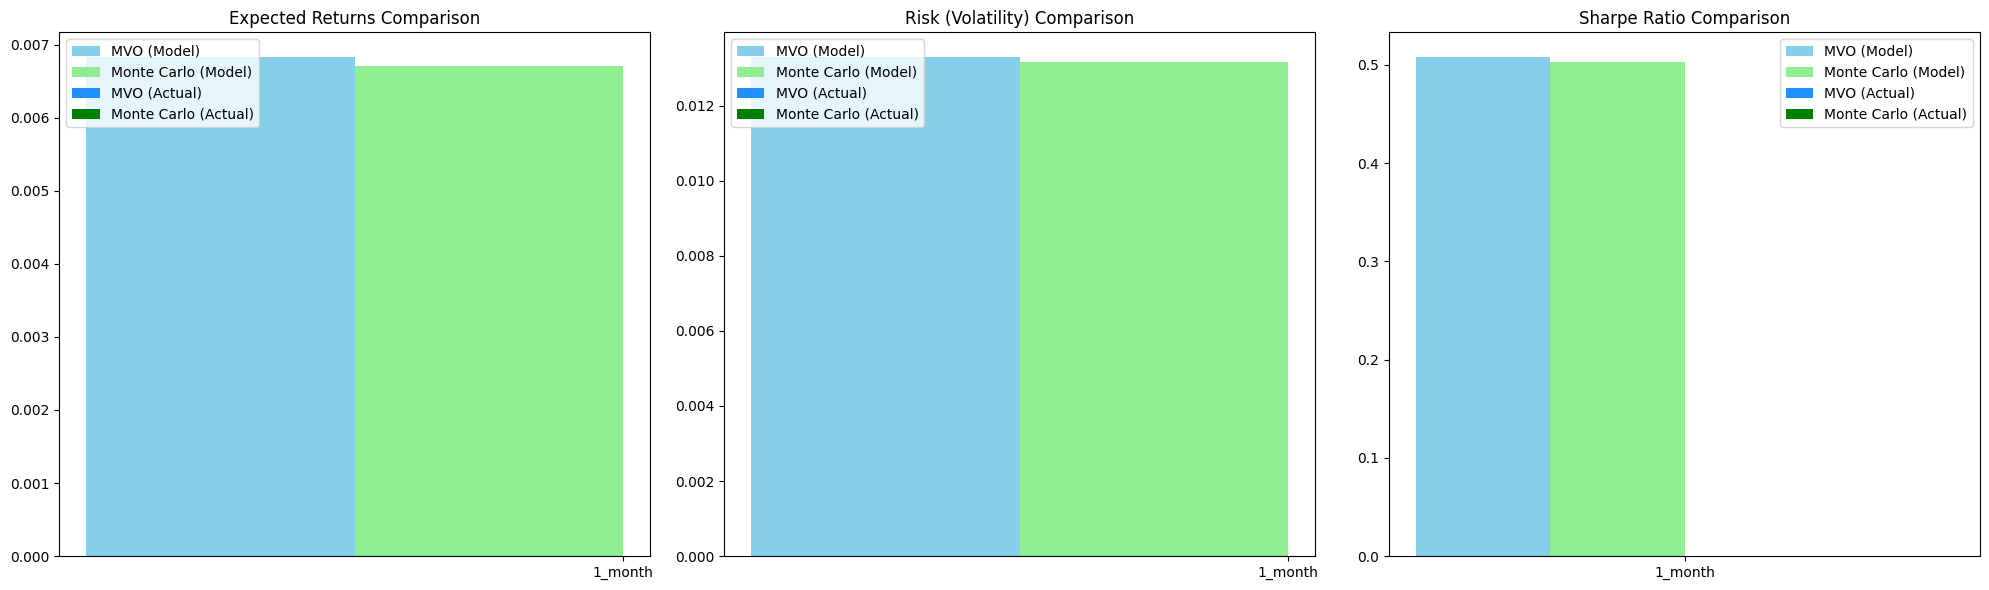

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_actual_performance(all_data, selected_symbols, time_horizons, horizon_optimization_results):
    """
    Tính toán hiệu suất thực tế (return, risk, sharpe) của danh mục cho mỗi phương pháp (MVO, Monte Carlo)
    dựa trên dữ liệu giá thực tế được lưu trong all_data.

    Parameters:
        all_data: dict, key là mã cổ phiếu, value là DataFrame chứa các cột, trong đó có 'closing_price'
        selected_symbols: list, danh sách mã cổ phiếu được chọn
        time_horizons: dict, key là tên mốc thời gian, value là số phiên giao dịch (ví dụ: {'1_month':21, ...})
        horizon_optimization_results: dict, kết quả tối ưu hóa chứa trọng số của từng phương pháp cho mỗi mốc thời gian

    Returns:
        actual_results: dict, với cấu trúc:
            actual_results[horizon] = {
                'mvo': {'return': ..., 'risk': ..., 'sharpe': ...},
                'monte_carlo': {'return': ..., 'risk': ..., 'sharpe': ...}
            }
    """
    actual_results = {}
    risk_free_rate = 0.02 / 252  # Lãi suất phi rủi ro hàng ngày

    # Tạo DataFrame chứa giá đóng cửa của các cổ phiếu đã chọn
    price_df = pd.DataFrame({stock: all_data[stock]['closing_price'] for stock in selected_symbols})

    # Tính log returns
    log_returns = np.log(price_df / price_df.shift(1))

    for horizon, days in time_horizons.items():
        # Nếu số phiên giao dịch yêu cầu lớn hơn số phiên có sẵn thì bỏ qua
        if days > len(log_returns):
            continue

        recent_returns = log_returns.iloc[-days:, :]
        actual_results[horizon] = {}

        # Tính hiệu suất cho từng phương pháp
        for method in ['mvo', 'monte_carlo']:
            # Lấy trọng số từ kết quả tối ưu hóa của mô hình (mảng vector có độ dài = số cổ phiếu)
            weights = np.array(horizon_optimization_results[horizon][method]['weights'])

            # Kiểm tra số lượng trọng số có khớp với số cột (số cổ phiếu) không
            if recent_returns.shape[1] != len(weights):
                raise ValueError(f"Mismatch for horizon {horizon} in method {method}: returns have {recent_returns.shape[1]} columns but weights length is {len(weights)}")

            # Tính lợi nhuận danh mục thực tế
            portfolio_returns = recent_returns @ weights

            # Tính các chỉ số: Expected Return, Risk và Sharpe Ratio
            exp_return = portfolio_returns.mean()
            risk = portfolio_returns.std()
            sharpe = (exp_return - risk_free_rate) / risk if risk > 0 else 0

            actual_results[horizon][method] = {
                'return': exp_return,
                'risk': risk,
                'sharpe': sharpe
            }

    return actual_results

def plot_comparison(actual_results, horizon_optimization_results):
    """
    Vẽ biểu đồ so sánh hiệu suất thực tế (dựa trên giá thực tế) và kết quả dự đoán từ mô hình (từ horizon_optimization_results)
    cho cả 2 phương pháp (MVO, Monte Carlo) theo từng mốc thời gian.

    Biểu đồ sẽ so sánh Expected Return, Risk và Sharpe Ratio.
    """
    horizons = list(actual_results.keys())

    # Các giá trị thực tế tính được theo phương pháp
    mvo_actual_returns = [actual_results[h]['mvo']['return'] for h in horizons]
    mc_actual_returns  = [actual_results[h]['monte_carlo']['return'] for h in horizons]

    mvo_actual_risks = [actual_results[h]['mvo']['risk'] for h in horizons]
    mc_actual_risks  = [actual_results[h]['monte_carlo']['risk'] for h in horizons]

    mvo_actual_sharpes = [actual_results[h]['mvo']['sharpe'] for h in horizons]
    mc_actual_sharpes  = [actual_results[h]['monte_carlo']['sharpe'] for h in horizons]

    # Các giá trị mô hình (expected) từ horizon_optimization_results
    mvo_model_returns = [horizon_optimization_results[h]['mvo']['return'] for h in horizons]
    mc_model_returns  = [horizon_optimization_results[h]['monte_carlo']['return'] for h in horizons]

    mvo_model_risks = [horizon_optimization_results[h]['mvo']['risk'] for h in horizons]
    mc_model_risks  = [horizon_optimization_results[h]['monte_carlo']['risk'] for h in horizons]

    mvo_model_sharpes = [horizon_optimization_results[h]['mvo']['sharpe'] for h in horizons]
    mc_model_sharpes  = [horizon_optimization_results[h]['monte_carlo']['sharpe'] for h in horizons]

    x = np.arange(len(horizons))
    width = 0.15  # Độ rộng cột

    fig, axes = plt.subplots(1, 3, figsize=(20, 6))

    # Biểu đồ so sánh Expected Return
    axes[0].bar(x - 1.5*width, mvo_model_returns, width, label='MVO (Model)', color='skyblue')
    axes[0].bar(x - 0.5*width, mc_model_returns, width, label='Monte Carlo (Model)', color='lightgreen')
    axes[0].bar(x + 0.5*width, mvo_actual_returns, width, label='MVO (Actual)', color='dodgerblue')
    axes[0].bar(x + 1.5*width, mc_actual_returns, width, label='Monte Carlo (Actual)', color='green')
    axes[0].set_title('Expected Returns Comparison')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(horizons)
    axes[0].legend()

    # Biểu đồ so sánh Risk (Volatility)
    axes[1].bar(x - 1.5*width, mvo_model_risks, width, label='MVO (Model)', color='skyblue')
    axes[1].bar(x - 0.5*width, mc_model_risks, width, label='Monte Carlo (Model)', color='lightgreen')
    axes[1].bar(x + 0.5*width, mvo_actual_risks, width, label='MVO (Actual)', color='dodgerblue')
    axes[1].bar(x + 1.5*width, mc_actual_risks, width, label='Monte Carlo (Actual)', color='green')
    axes[1].set_title('Risk (Volatility) Comparison')
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(horizons)
    axes[1].legend()

    # Biểu đồ so sánh Sharpe Ratio
    axes[2].bar(x - 1.5*width, mvo_model_sharpes, width, label='MVO (Model)', color='skyblue')
    axes[2].bar(x - 0.5*width, mc_model_sharpes, width, label='Monte Carlo (Model)', color='lightgreen')
    axes[2].bar(x + 0.5*width, mvo_actual_sharpes, width, label='MVO (Actual)', color='dodgerblue')
    axes[2].bar(x + 1.5*width, mc_actual_sharpes, width, label='Monte Carlo (Actual)', color='green')
    axes[2].set_title('Sharpe Ratio Comparison')
    axes[2].set_xticks(x)
    axes[2].set_xticklabels(horizons)
    axes[2].legend()

    plt.tight_layout()
    plt.show()

# ---------------------------
# Giả sử bạn có:
# - all_data: dict, với key là mã cổ phiếu, value là DataFrame chứa các cột bao gồm 'closing_price'
# - selected_symbols: list chứa các mã cổ phiếu đã chọn
# - time_horizons: dict ví dụ: {'1_month': 21, '6_months': 126, '1_year': 252}
# - horizon_optimization_results: dict như bạn đã mô tả, mỗi horizon có trọng số và chỉ số từ cả MVO và Monte Carlo

# Tính hiệu suất thực tế cho cả 2 phương pháp
actual_results = calculate_actual_performance(all_data, selected_symbols, time_horizons, horizon_optimization_results)

# Vẽ biểu đồ so sánh giữa kết quả mô hình (expected) và kết quả thực tế (actual)
plot_comparison(actual_results, horizon_optimization_results)


In [159]:
def calculate_actual_results(all_data, selected_symbols, time_horizons, portfolio_weights):
    """
    Tính toán kết quả thực tế của danh mục dựa trên dữ liệu thực tế trong all_data.

    Parameters:
    - all_data: dict chứa DataFrame của từng cổ phiếu
    - selected_symbols: danh sách các mã cổ phiếu trong danh mục
    - time_horizons: dict chứa số ngày giao dịch của từng mốc thời gian
    - portfolio_weights: dict với key là horizon và value là vector trọng số (mảng numpy hoặc list)

    Returns:
    - actual_results: dict chứa return, risk, sharpe theo từng mốc thời gian
    """
    actual_results = {}
    risk_free_rate = 0.02 / 252  # Giả sử lãi suất phi rủi ro hàng ngày

    # Tạo DataFrame chứa giá đóng cửa của tất cả các cổ phiếu
    price_df = pd.DataFrame({stock: all_data[stock]['closing_price'] for stock in selected_symbols})

    # Tính log returns
    log_returns = np.log(price_df / price_df.shift(1))

    for horizon, days in time_horizons.items():
        # Kiểm tra nếu dữ liệu không đủ
        if days > len(log_returns):
            continue

        recent_returns = log_returns.iloc[-days:, :]

        # Lấy vector trọng số cho mốc thời gian này
        weights = np.array(portfolio_weights[horizon])

        # Kiểm tra số lượng cổ phiếu và số trọng số
        if recent_returns.shape[1] != len(weights):
            raise ValueError(f"Mismatch for horizon {horizon}: returns have {recent_returns.shape[1]} columns but weights length is {len(weights)}")

        # Tính lợi nhuận danh mục
        portfolio_returns = recent_returns @ weights

        # Tính các chỉ số
        expected_return = portfolio_returns.mean()
        risk = portfolio_returns.std()
        sharpe = (expected_return - risk_free_rate) / risk if risk > 0 else 0

        actual_results[horizon] = {
            "return": expected_return,
            "risk": risk,
            "sharpe": sharpe
        }

    return actual_results

mvo_weights_dict = {horizon: horizon_optimization_results[horizon]['mvo']['weights'] for horizon in time_horizons}

# Tính actual_results sử dụng dữ liệu thực tế trong all_data và trọng số của MVO
actual_results = calculate_actual_results(all_data, selected_symbols, time_horizons, mvo_weights_dict)

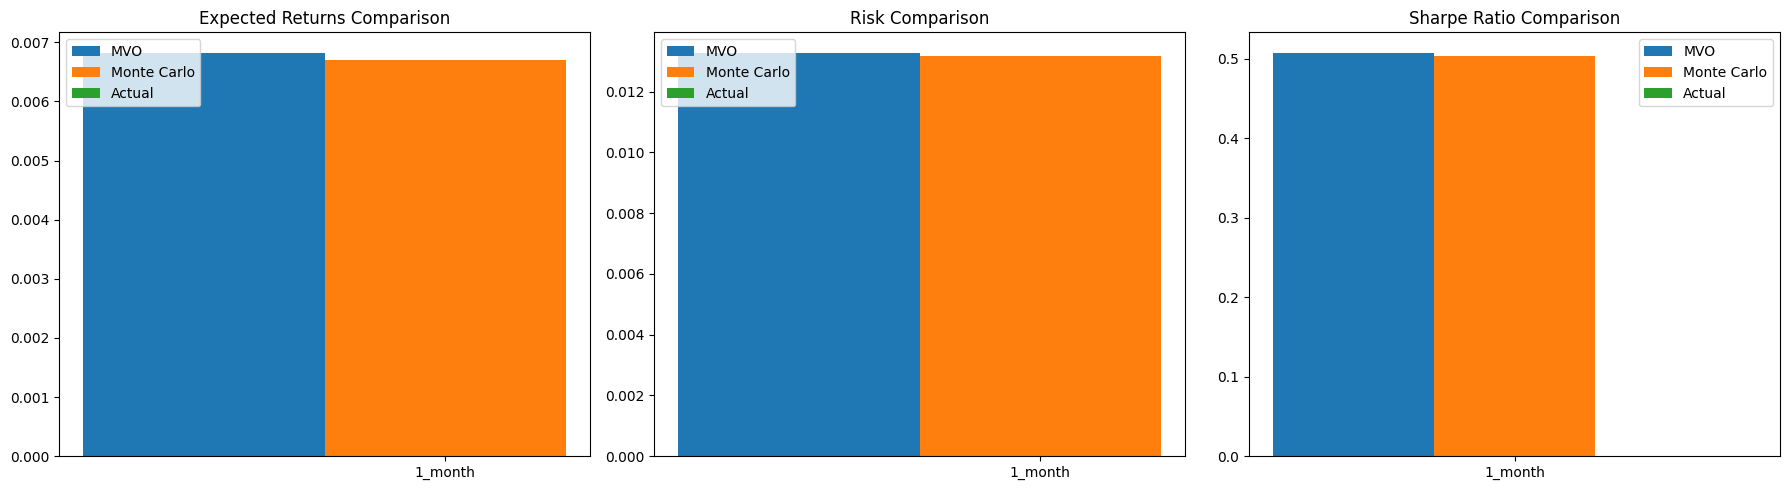

In [160]:
def plot_performance_comparison(horizon_optimization_results, actual_results):
    horizons = list(horizon_optimization_results.keys())
    mvo_returns = [horizon_optimization_results[h]['mvo']['return'] for h in horizons]
    mc_returns = [horizon_optimization_results[h]['monte_carlo']['return'] for h in horizons]
    actual_returns = [actual_results[h]['return'] for h in horizons]

    mvo_risks = [horizon_optimization_results[h]['mvo']['risk'] for h in horizons]
    mc_risks = [horizon_optimization_results[h]['monte_carlo']['risk'] for h in horizons]
    actual_risks = [actual_results[h]['risk'] for h in horizons]

    mvo_sharpes = [horizon_optimization_results[h]['mvo']['sharpe'] for h in horizons]
    mc_sharpes = [horizon_optimization_results[h]['monte_carlo']['sharpe'] for h in horizons]
    actual_sharpes = [actual_results[h]['sharpe'] for h in horizons]

    x = np.arange(len(horizons))
    width = 0.2

    fig, ax = plt.subplots(1, 3, figsize=(18, 5))

    ax[0].bar(x - width, mvo_returns, width, label='MVO')
    ax[0].bar(x, mc_returns, width, label='Monte Carlo')
    ax[0].bar(x + width, actual_returns, width, label='Actual')
    ax[0].set_title('Expected Returns Comparison')
    ax[0].set_xticks(x)
    ax[0].set_xticklabels(horizons)
    ax[0].legend()

    ax[1].bar(x - width, mvo_risks, width, label='MVO')
    ax[1].bar(x, mc_risks, width, label='Monte Carlo')
    ax[1].bar(x + width, actual_risks, width, label='Actual')
    ax[1].set_title('Risk Comparison')
    ax[1].set_xticks(x)
    ax[1].set_xticklabels(horizons)
    ax[1].legend()

    ax[2].bar(x - width, mvo_sharpes, width, label='MVO')
    ax[2].bar(x, mc_sharpes, width, label='Monte Carlo')
    ax[2].bar(x + width, actual_sharpes, width, label='Actual')
    ax[2].set_title('Sharpe Ratio Comparison')
    ax[2].set_xticks(x)
    ax[2].set_xticklabels(horizons)
    ax[2].legend()

    plt.tight_layout()
    plt.show()

plot_performance_comparison(horizon_optimization_results, actual_results)

In [161]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def compare_mvo_monte_carlo(selected_symbols,
                            mvo_weights, mc_weights,
                            expected_returns, risks, sharpe_ratios,
                            mvo_return, mvo_risk, mvo_sharpe,
                            mc_return, mc_risk, mc_sharpe):

    n_stocks = len(selected_symbols)
    x = np.arange(n_stocks)
    width = 0.35  # Độ rộng của cột trong bar chart

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # --- Biểu đồ 1: So sánh trọng số danh mục ---
    axes[0].bar(x - width/2, mvo_weights, width, label='MVO', alpha=0.7)
    axes[0].bar(x + width/2, mc_weights, width, label='Monte Carlo', alpha=0.7)
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(selected_symbols, rotation=45)
    axes[0].set_ylabel('Portfolio Weight')
    axes[0].set_title('Comparison of Portfolio Allocations')
    axes[0].legend()

    # --- Biểu đồ 2: So sánh Hiệu suất danh mục (Return vs Risk) ---
    # Vẽ hai điểm (MVO và MC)
    mvo_point = axes[1].scatter(mvo_risk, mvo_return, color='blue',
                                label=f'MVO (Sharpe: {mvo_sharpe:.2f})', s=200, alpha=0.8)
    mc_point = axes[1].scatter(mc_risk, mc_return, color='red',
                               label=f'Monte Carlo (Sharpe: {mc_sharpe:.2f})', s=200, alpha=0.8)

    # Thêm nhãn cho từng điểm
    offset = 0.0000001  # Điều chỉnh offset để label không đè lên điểm
    axes[1].text(mvo_risk + offset, mvo_return + offset, "MVO",
                 ha='left', va='bottom', fontsize=9, color='blue')
    axes[1].text(mc_risk + offset, mc_return + offset, "Monte Carlo",
                 ha='left', va='bottom', fontsize=9, color='red')

    # Cài đặt nhãn và tiêu đề
    axes[1].set_xlabel('Risk (Standard Deviation)')
    axes[1].set_ylabel('Expected Return')
    axes[1].set_title('Return vs Risk Comparison')
    axes[1].legend()

    # Tính toán giới hạn cho trục x và y để nhìn rõ các điểm
    # Tạo padding 10% (có thể chỉnh lại nếu muốn)
    min_x = min(mvo_risk, mc_risk)
    max_x = max(mvo_risk, mc_risk)
    padding_x = (max_x - min_x) * 0.1 if max_x > min_x else 0.001
    axes[1].set_xlim(min_x - padding_x, max_x + padding_x)

    min_y = min(mvo_return, mc_return)
    max_y = max(mvo_return, mc_return)
    padding_y = (max_y - min_y) * 0.1 if max_y > min_y else 0.0001
    axes[1].set_ylim(min_y - padding_y, max_y + padding_y)

    plt.tight_layout()
    plt.show()

    # --- Bảng so sánh ---
    summary_df = pd.DataFrame({
        "Method": ["MVO", "Monte Carlo"],
        "Expected Return": [mvo_return, mc_return],
        "Risk": [mvo_risk, mc_risk],
        "Sharpe Ratio": [mvo_sharpe, mc_sharpe]
    })

    print("\n=== Portfolio Optimization Comparison ===")
    print(summary_df.to_string(index=False))


In [162]:

def plot_portfolio_allocation(mvo_weights, selected_symbols):
    """
    1. Biểu đồ phân bổ trọng số danh mục đầu tư (Pie chart)
    """
    plt.figure(figsize=(6, 6))
    plt.pie(mvo_weights, labels=selected_symbols, autopct='%1.1f%%', startangle=90, shadow=True)
    plt.title('Phân bổ danh mục đầu tư theo mô hình MVO', fontsize=14)
    plt.axis('equal')  # Đảm bảo pie chart là hình tròn
    plt.tight_layout()
    plt.show()

def plot_return_risk_comparison(expected_returns, risks, selected_symbols):
    """
    2. Biểu đồ so sánh tỷ suất lợi nhuận và rủi ro
    """
    plt.figure(figsize=(8, 6))
    x = np.arange(len(selected_symbols))
    width = 0.35

    plt.bar(x - width/2, [r*100 for r in expected_returns], width,
            label='Lợi nhuận kỳ vọng (%)', color='green', alpha=0.7)
    plt.bar(x + width/2, [r*100 for r in risks], width,
            label='Rủi ro (%)', color='red', alpha=0.7)

    plt.xlabel('Mã cổ phiếu')
    plt.ylabel('Phần trăm (%)')
    plt.title('Lợi nhuận kỳ vọng và rủi ro của từng cổ phiếu', fontsize=14)
    plt.xticks(x, selected_symbols)
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_portfolio_performance(all_data, selected_symbols, mvo_weights):
    """
    3. Biểu đồ hiệu suất của danh mục đầu tư theo thời gian
       - Giả sử all_data[symbol] có cột 'closing_price'.
       - Vẽ giá trị danh mục + tỷ suất lợi nhuận theo thời gian.
    """
    plt.figure(figsize=(14, 7))
    closing_prices = {}
    portfolio_value = None
    dates = None

    # Lấy 252 ngày (1 năm) gần nhất, tùy chỉnh nếu cần
    for symbol in selected_symbols:
        stock_data = all_data[symbol].reset_index()
        if dates is None:
            dates = stock_data.index[-252:]  # Lấy 1 năm gần nhất

        # Lấy giá đóng cửa 1 năm gần nhất
        closing_prices[symbol] = stock_data['closing_price'].iloc[-252:].values

        # Tính giá trị danh mục đầu tư
        weight = mvo_weights[selected_symbols.index(symbol)]
        if portfolio_value is None:
            portfolio_value = closing_prices[symbol] * weight
        else:
            portfolio_value += closing_prices[symbol] * weight

    # Vẽ biểu đồ giá trị danh mục đầu tư
    plt.subplot(2, 1, 1)
    plt.plot(dates, portfolio_value, 'b-', linewidth=2)
    plt.title('Giá trị danh mục đầu tư theo thời gian', fontsize=14)
    plt.xlabel('Ngày')
    plt.ylabel('Giá trị')
    plt.grid(True, linestyle='--', alpha=0.7)

    # Vẽ biểu đồ tỷ suất lợi nhuận danh mục
    plt.subplot(2, 1, 2)
    portfolio_returns = np.diff(portfolio_value) / portfolio_value[:-1]
    plt.plot(dates[1:], portfolio_returns, 'g-', linewidth=1)
    plt.axhline(y=0, color='r', linestyle='-', alpha=0.3)
    plt.fill_between(dates[1:], portfolio_returns, 0,
                     where=(portfolio_returns > 0), color='green', alpha=0.3)
    plt.fill_between(dates[1:], portfolio_returns, 0,
                     where=(portfolio_returns < 0), color='red', alpha=0.3)
    plt.title('Tỷ suất lợi nhuận danh mục đầu tư theo thời gian', fontsize=14)
    plt.xlabel('Ngày')
    plt.ylabel('Tỷ suất lợi nhuận')
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

def plot_sharpe_ratios(selected_symbols, sharpe_ratios, port_sharpe):
    """
    4. Biểu đồ so sánh Sharpe ratio
    """
    plt.figure(figsize=(8, 6))
    plt.bar(selected_symbols, sharpe_ratios, color='purple', alpha=0.7)
    plt.axhline(y=port_sharpe, color='r', linestyle='--',
                label=f'Sharpe ratio của danh mục: {port_sharpe:.4f}')
    plt.title('Sharpe ratio của các cổ phiếu trong danh mục', fontsize=14)
    plt.xlabel('Mã cổ phiếu')
    plt.ylabel('Sharpe ratio')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

def plot_correlation_matrix(market_data, selected_symbols):
    """
    5. Biểu đồ ma trận tương quan giữa các cổ phiếu
       - market_data là dữ liệu (DataFrame hoặc array) chứa các cột là các mã cổ phiếu
    """
    plt.figure(figsize=(8, 6))
    # Giả sử market_data là numpy array. Nếu là DataFrame, dùng .corr() sẽ tiện hơn
    correlation_matrix = np.corrcoef(market_data, rowvar=False)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
                xticklabels=selected_symbols, yticklabels=selected_symbols)
    plt.title('Ma trận tương quan giữa các cổ phiếu', fontsize=14)
    plt.tight_layout()
    plt.show()

def plot_prediction_comparison(all_predictions, selected_symbols):
    """
    6. Biểu đồ so sánh dự báo và giá thực tế (LSTM vs Actual)
       - all_predictions[symbol] = {'y_test':..., 'lstm_pred':...}
    """
    plt.figure(figsize=(12, 10))
    for i, symbol in enumerate(selected_symbols):
        plt.subplot(2, 2, i+1)
        y_test = all_predictions[symbol]['y_test']
        lstm_pred = all_predictions[symbol]['y_pred']

        plt.plot(y_test, label='Giá thực tế', color='blue')
        plt.plot(lstm_pred, label='Dự báo', color='red', linestyle='--')

        plt.title(f'So sánh dự báo và giá thực tế - {symbol}', fontsize=12)
        plt.xlabel('Thời gian')
        plt.ylabel('Giá cổ phiếu (đã chuẩn hóa)')
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

def plot_efficient_frontier(selected_symbols, expected_returns, cov_matrix,
                            port_risk, port_return, num_portfolios=10000,
                            risk_free_rate=0.02/52, label_mvo='Danh mục MVO'):
    """
    7. Biểu đồ đường hiệu quả (Efficient Frontier)
       - Sinh num_portfolios danh mục ngẫu nhiên để tạo scatter.
       - Đánh dấu danh mục tối ưu MVO trên biểu đồ.
    """
    results = np.zeros((3, num_portfolios))
    weights_record = []
    n = len(selected_symbols)

    for i in range(num_portfolios):
        weights = np.random.random(n)
        weights /= np.sum(weights)
        weights_record.append(weights)

        p_return = np.sum(weights * expected_returns)
        p_risk = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        p_sharpe = (p_return - risk_free_rate) / p_risk if p_risk > 0 else 0

        results[0, i] = p_return
        results[1, i] = p_risk
        results[2, i] = p_sharpe

    # Tìm danh mục Sharpe tối đa
    max_sharpe_idx = np.argmax(results[2])
    max_sharpe_return = results[0, max_sharpe_idx]
    max_sharpe_risk = results[1, max_sharpe_idx]

    # Tìm danh mục rủi ro tối thiểu
    min_risk_idx = np.argmin(results[1])
    min_risk_return = results[0, min_risk_idx]
    min_risk_risk = results[1, min_risk_idx]

    plt.figure(figsize=(10, 7))
    sc = plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis',
                     marker='o', alpha=0.5)
    plt.colorbar(sc, label='Sharpe ratio')

    # Đánh dấu các danh mục đặc biệt
    plt.scatter(max_sharpe_risk, max_sharpe_return, marker='*', color='r', s=300, label='Sharpe tối đa')
    plt.scatter(min_risk_risk, min_risk_return, marker='*', color='g', s=300, label='Rủi ro tối thiểu')
    plt.scatter(port_risk, port_return, marker='*', color='black', s=300, label=label_mvo)

    plt.title('Đường hiệu quả (Efficient Frontier)', fontsize=14)
    plt.xlabel('Rủi ro (Volatility)')
    plt.ylabel('Lợi nhuận kỳ vọng')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

def print_summary_table(selected_symbols, mvo_weights, expected_returns,
                        risks, sharpe_ratios, port_return, port_risk, port_sharpe):
    """
    8. Tạo bảng thống kê tổng hợp danh mục đầu tư
    """
    summary_data = {
        'Cổ phiếu': selected_symbols,
        'Trọng số (%)': [w*100 for w in mvo_weights],
        'Lợi nhuận kỳ vọng (%)': [r*100 for r in expected_returns],
        'Rủi ro (%)': [r*100 for r in risks],
        'Sharpe ratio': sharpe_ratios
    }

    summary_df = pd.DataFrame(summary_data)
    summary_df = summary_df.sort_values('Trọng số (%)', ascending=False).round(2)

    print("\nBảng thống kê tổng hợp danh mục đầu tư:")
    print(summary_df.to_string(index=False))

    # Thêm hàng tổng
    total_row = pd.DataFrame({
        'Cổ phiếu': ['TỔNG'],
        'Trọng số (%)': [sum(mvo_weights)*100],  # hoặc sum(w*100 for w in mvo_weights)
        'Lợi nhuận kỳ vọng (%)': [port_return*100],
        'Rủi ro (%)': [port_risk*100],
        'Sharpe ratio': [port_sharpe]
    }).round(2)

    summary_df = pd.concat([summary_df, total_row], ignore_index=True)
    print("\nKết quả tổng hợp:")
    print(summary_df.to_string(index=False))

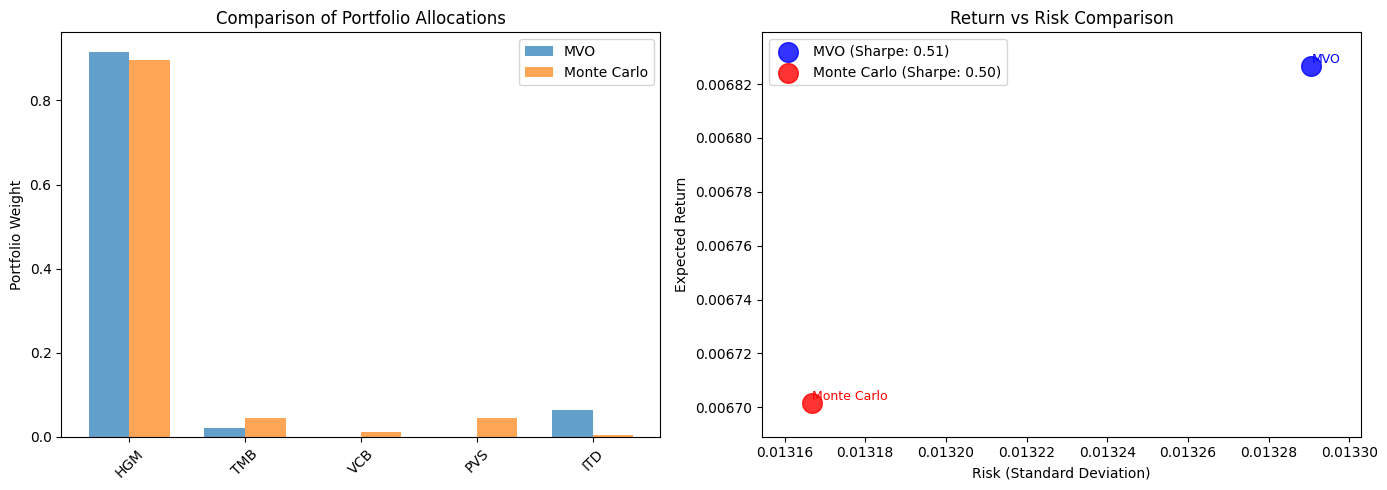


=== Portfolio Optimization Comparison ===
     Method  Expected Return     Risk  Sharpe Ratio
        MVO         0.006827 0.013290      0.507681
Monte Carlo         0.006702 0.013167      0.502949


In [163]:
compare_mvo_monte_carlo(selected_symbols,
                        mvo_weights, mc_weights,
                        expected_returns, risks, sharpe_ratios,
                        port_return, port_risk, port_sharpe,
                        mc_port_return, mc_port_risk, mc_port_sharpe)

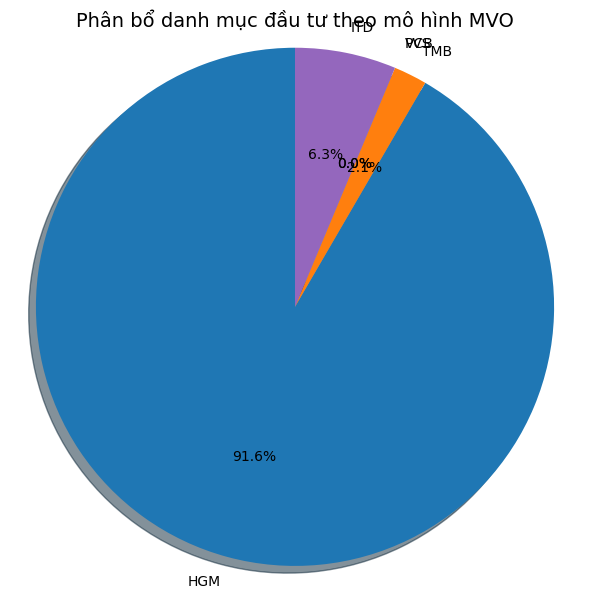

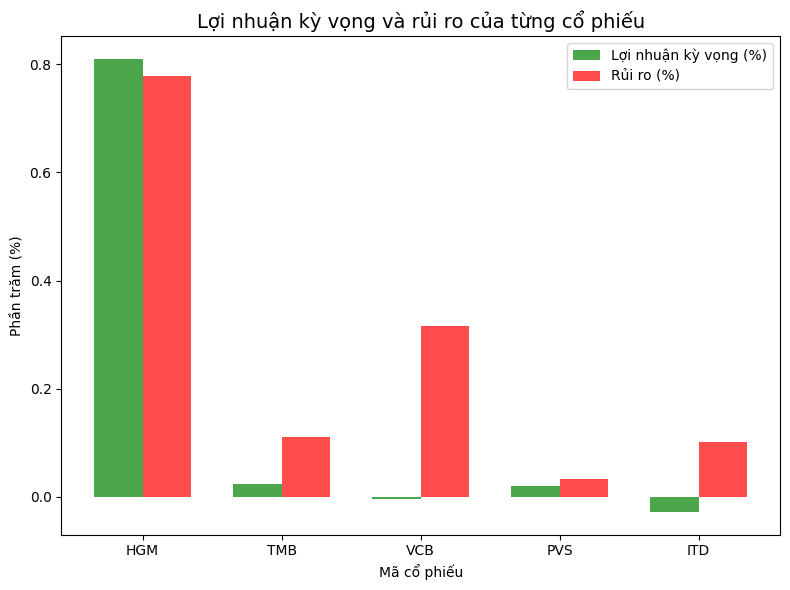

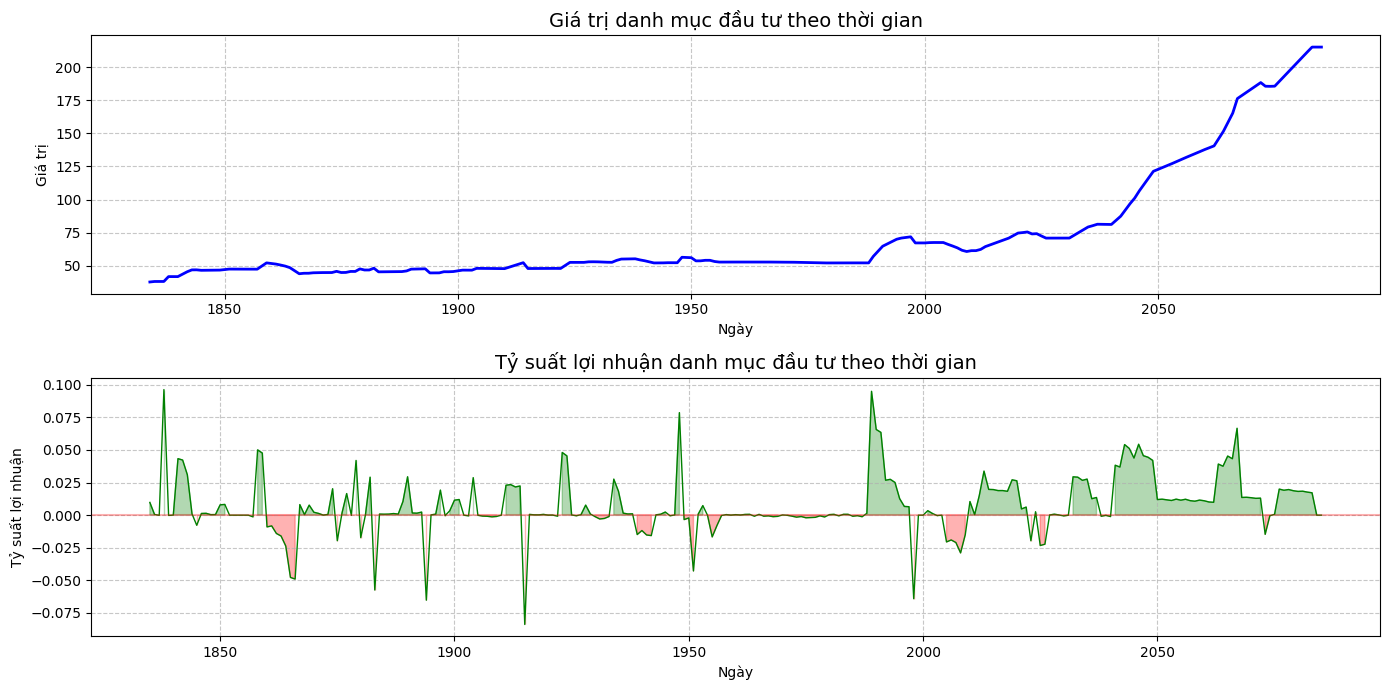

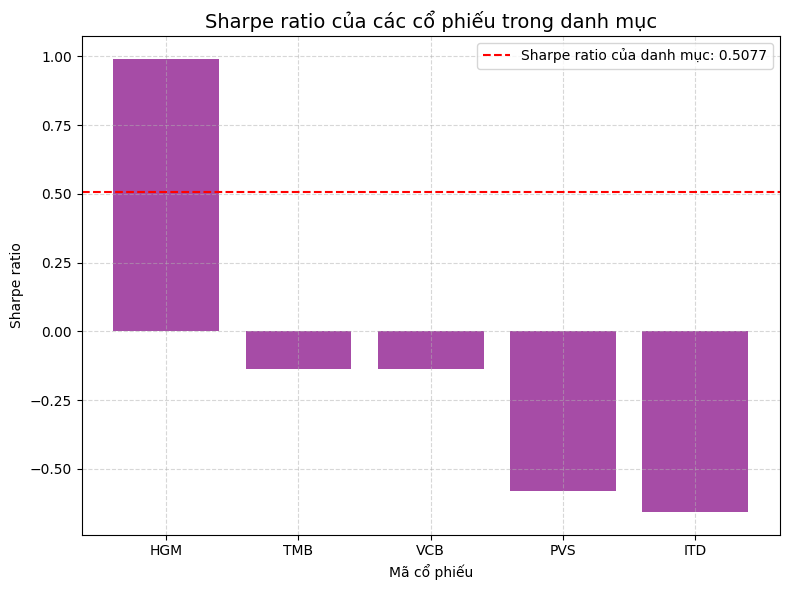

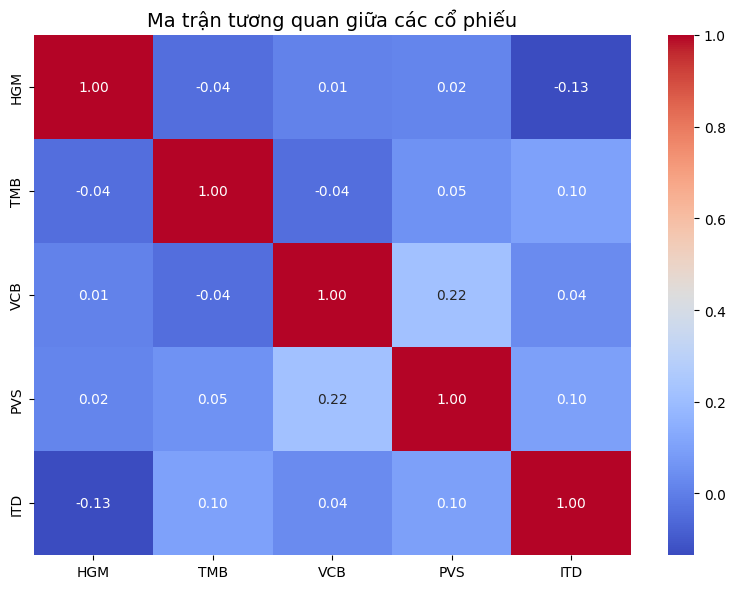

ValueError: num must be an integer with 1 <= num <= 4, not 5

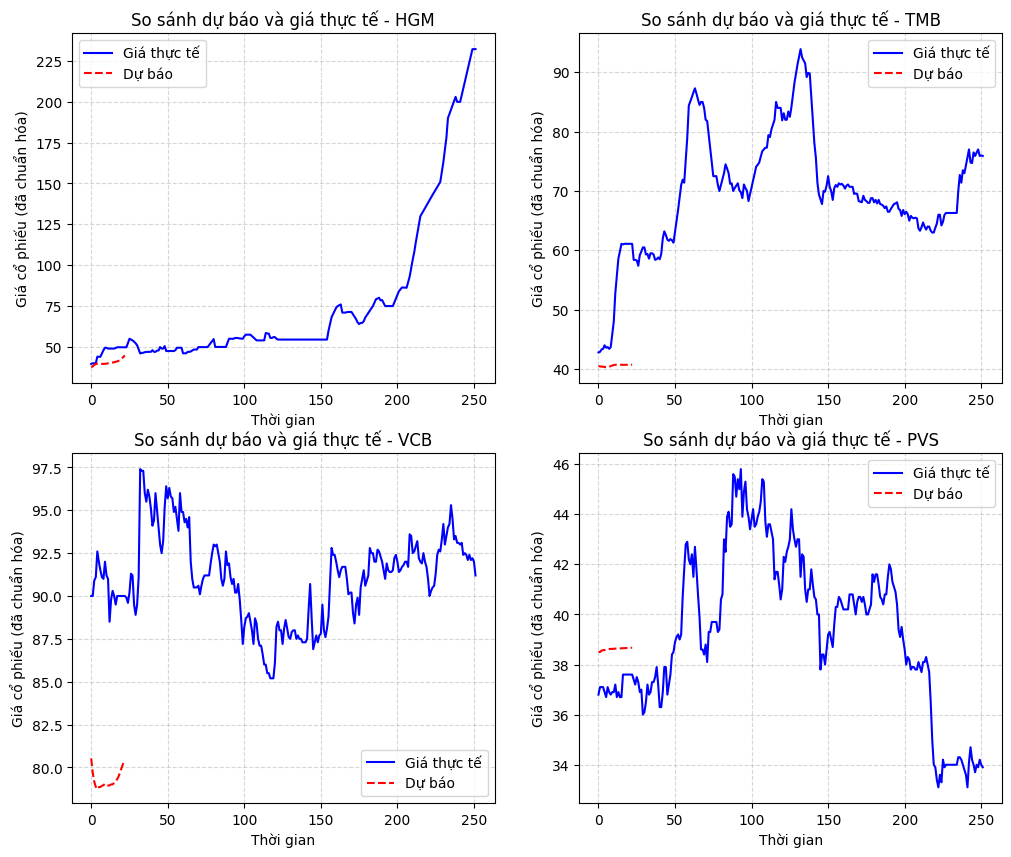

In [164]:
plot_portfolio_allocation(mvo_weights, selected_symbols)
plot_return_risk_comparison(expected_returns, risks, selected_symbols)
plot_portfolio_performance(all_data, selected_symbols, mvo_weights)
plot_sharpe_ratios(selected_symbols, sharpe_ratios, port_sharpe)
plot_correlation_matrix(market_data, selected_symbols)
plot_prediction_comparison(all_predictions, selected_symbols)
plot_efficient_frontier(selected_symbols, expected_returns, cov_matrix, port_risk, port_return)
print_summary_table(selected_symbols, mvo_weights, expected_returns, risks, sharpe_ratios,
                    port_return, port_risk, port_sharpe)

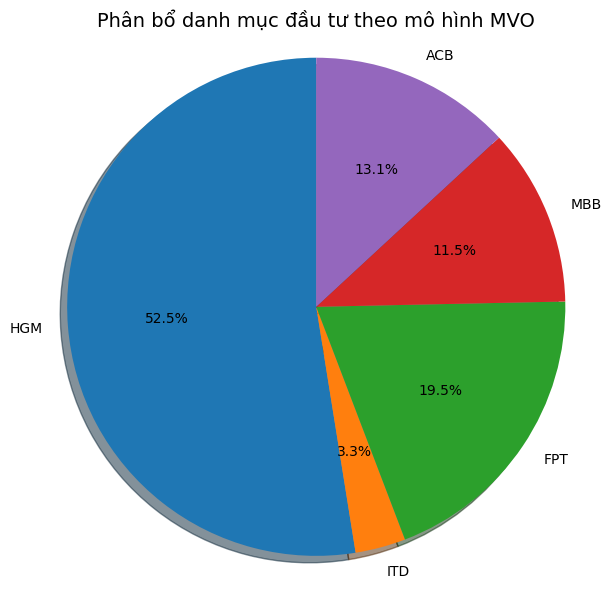

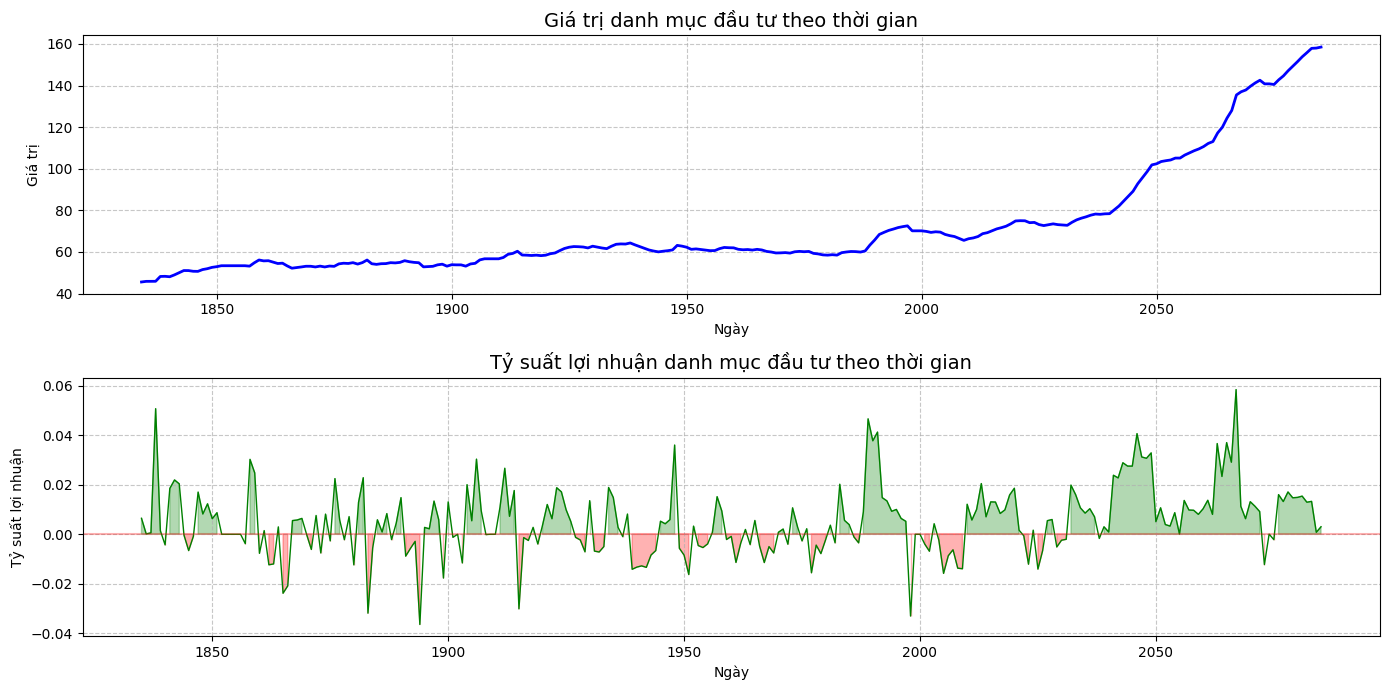

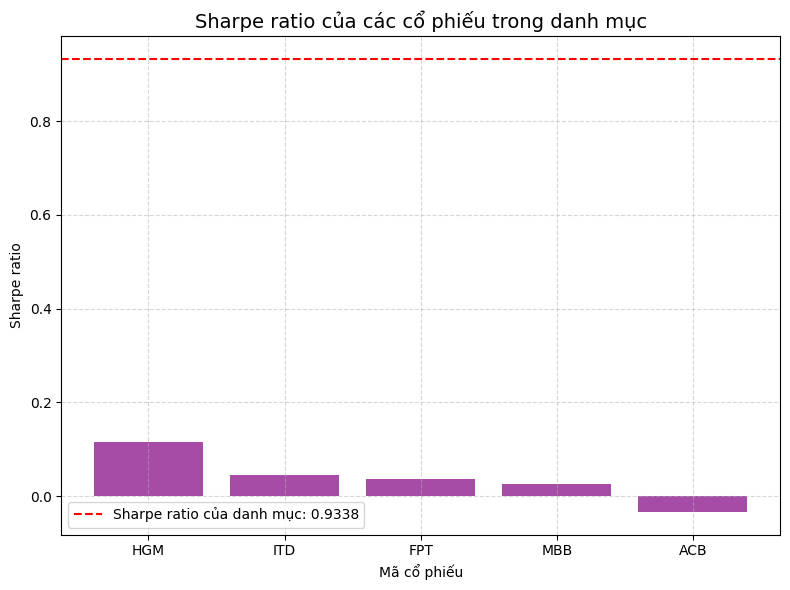

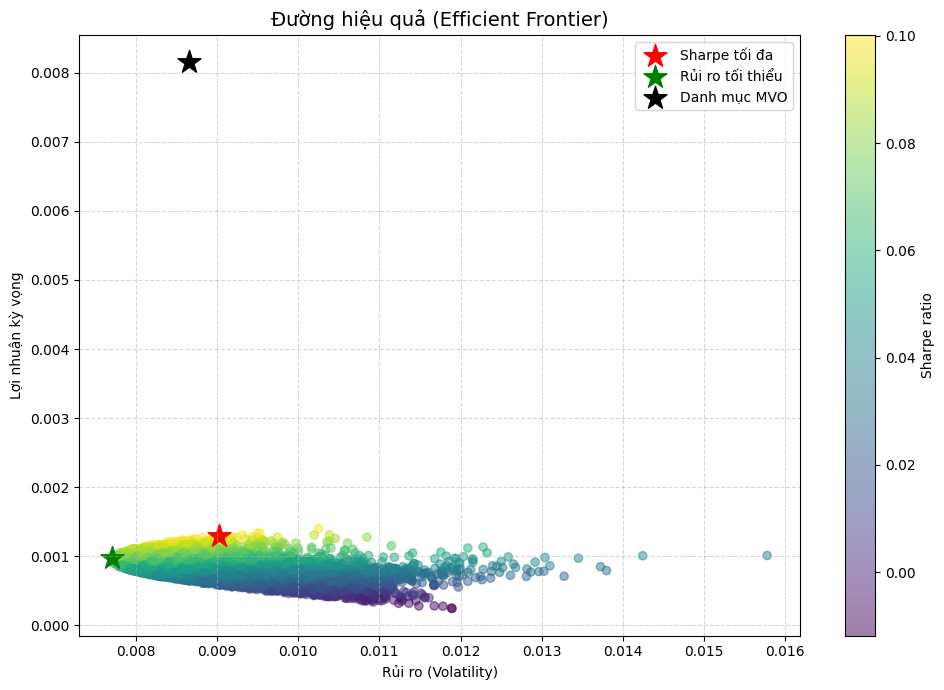


Bảng thống kê tổng hợp danh mục đầu tư:
Cổ phiếu  Trọng số (%)  Lợi nhuận kỳ vọng (%)  Rủi ro (%)  Sharpe ratio
     HGM         52.53                   0.17        1.14          0.12
     FPT         19.54                   0.06        0.59          0.04
     ACB         13.12                   0.01        0.93         -0.03
     MBB         11.54                   0.07        1.02          0.03
     ITD          3.27                   0.10        1.28          0.05

Kết quả tổng hợp:
Cổ phiếu  Trọng số (%)  Lợi nhuận kỳ vọng (%)  Rủi ro (%)  Sharpe ratio
     HGM         52.53                   0.17        1.14          0.12
     FPT         19.54                   0.06        0.59          0.04
     ACB         13.12                   0.01        0.93         -0.03
     MBB         11.54                   0.07        1.02          0.03
     ITD          3.27                   0.10        1.28          0.05
    TỔNG        100.00                   0.82        0.86          0.93


In [145]:
plot_portfolio_allocation(mc_weights, selected_symbols)
plot_portfolio_performance(all_data, selected_symbols, mc_weights)
plot_sharpe_ratios(selected_symbols, sharpe_ratios, mc_port_sharpe)
plot_efficient_frontier(selected_symbols, expected_returns, cov_matrix, mc_port_risk, mc_port_return)
print_summary_table(selected_symbols, mc_weights, expected_returns, risks, sharpe_ratios,
                    mc_port_return, mc_port_risk, mc_port_sharpe)